# **<h3 align="center">Machine Learning - Project</h3>**
## **<h3 align="center">Group 30 - Project</h3>**

**Group members:**<br>Alexandra Pinto - 20211599@novaims.unl.pt - 20211599<br>
Gonçalo Peres - 20211625@novaims.unl.pt - 20211625<br>
Leonor Mira - 20240658@novaims.unl.pt - 20240658<br>
Miguel Natário - 20240498@novaims.unl.pt - 20240498<br>
Nuno Bernardino  - 2021546@novaims.unl.pt - 2021546<br>

## Table of Contents
* [1. Import the Libraries](#chapter1)
* [2. Import the Datasets](#chapter2)
* [3. Explore the Dataset ](#chapter3)
    * [3.1. Basic Statistics](#section_3_1)  #this need to be changed
    * [3.2. Inconsistencies](#section_3_2)
        * [3.2.1. Non Null Target](#sub_section_3_2_1)
        * [3.2.2. Checking Combinations of Code](#sub_section_3_2_2)
        * [3.2.3. Handling Average Weekly Wage Inconsistencies](#sub_section_3_2_3)
        * [3.2.4. Handling Birth Year Inconsistencies](#sub_section_3_2_4)
        * [3.2.5. Age at Injury vs. Birth Year](#sub_section_3_2_5)
        * [3.2.6. Age at Injury](#sub_section_3_2_6)
        * [3.2.7. First Hearing Date vs. Accident Date](#sub_section_3_2_7)
        * [3.2.8. C2 Date vs. C3 Date vs. Accident Date](#sub_section_3_2_8)
        * [3.2.9. Assembly Date vs. Accident Date](#sub_section_3_2_9)
        * [3.2.10.Handling ZIP Code Format](#sub_section_3_2_10)
        * [3.2.11. Gender Feature](#sub_section_3_2_11)
        * [3.2.12. Overview of Inconsistencies](#sub_section_3_2_12)
    * [3.3. Visualization](#section_3_3)  
* [4. Train Test Split](#chapter4)
* [5. Preprocessing the Data](#chapter5)
    * [5.1. Missing Values](#section_5_1)  
    * [5.2. Outliers](#section_5_2) 
    * [5.3. Categorical Features](#section_5_3) 
* [6. Feature Engineering](#chapter6)
    * [6.1. Carrier-District Interaction](#section_6_1)
    * [6.2. Income Category](#section_6_2)
    * [6.3. Has First Hearing Date](#section_6_3)
    * [6.4. Accident Quarter](#section_6_4)
    * [6.5. Accident Year](#section_6_5)
    * [6.6. Accident on Day and Weekend](#section_6_6)
    * [6.7. Age Group](#section_6_7)
    * [6.8. Time from Assembly Date to C-2 Filing](#section_6_8)
    * [6.9. Time from Accident to C-2 Filing](#section_6_9)
    * [6.10. ZIP Code Region](#section_6_10)
    * [6.11. Is UK Medical Fee Region](#section_6_11)
    * [6.12. Carrier Type Merged](#section_6_12)
    * [6.13. Carrier_Name_Simplified](#section_6_13)
* [7. Feature Selection](#chapter7)
    * [Scaling the Data](#section_7_1)  
    * [Numerical Features](#section_7_2) 
    * [Categorical Features](#section_7_3) 
    * [Final Features](#section_7_4)
* [8. Modeling](#chapter8) 

# 1. Import the Libraries<a class="anchor" id="chapter1"></a>

In [88]:
# Importing standard data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import zipfile

# Data partition
from sklearn.model_selection import train_test_split

# Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Filter methods
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.feature_selection import mutual_info_classif, chi2, SelectKBest

# Wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

# Embedded methods
from sklearn.linear_model import LassoCV

# Models
from sklearn.tree import DecisionTreeClassifier

# Metrics
from sklearn.metrics import classification_report, confusion_matrix

# Warnings
import warnings
warnings.filterwarnings('ignore')

# 2. Import the Datasets <a class="anchor" id="chapter2"></a>
Before importing the datasets, we need to unzip the data file.

In [89]:
zip_path = r'../Data.zip'  # Adjust based on actual location
extract_to_path = '../project_data'

# Extract files
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print("Extraction complete.")

Extraction complete.


In the following cell we will import the datasets and set Claim Identifier as our index.

In [90]:
df_train = pd.read_csv('../project_data/Data/train_data.csv', index_col='Claim Identifier')
df_test = pd.read_csv('../project_data/Data/test_data.csv',index_col='Claim Identifier')

To check that the imports really worked, we will use .head().

In [91]:
df_train.head(2)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0


In [92]:
df_test.head(2)


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
6165911,2022-12-24,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,INDEMNITY INSURANCE CO OF,...,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,54.0,LOWER LEG,10466,1
6166141,2022-11-20,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,A I U INSURANCE COMPANY,...,IV,NaN,75.0,FALLING OR FLYING OBJECT,10.0,CONTUSION,10.0,MULTIPLE HEAD INJURY,11691,1


## 3. Explore the Dataset <a class="anchor" id="chapter3"></a>
In this chapter we will perform the basic steps to get to know our dataset.

## 3.1. Basic Statistics <a class="anchor" id="section_3_1"></a>

The <span style='color:Blue'> info()  </span> method prints information about the dataframe.

In [93]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593471 entries, 5393875 to 818961390
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Injury Type     


***Some conclusions from the output above**: 
- some datatypes need to be changed, such as:
    - 'Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date' can be datetime;
    - 'Industry Code', 'Zip Code', 'WCIO Part Of Body Code', 'WCIO Cause of Injury Code ', 'WCIO Nature of Injury Code' are integers instead of float  --> since we have some missing valyes we will do it after treating them
    - same with 'Birth Year', and 'Age at Injury' --> since we have some missing valyes we will do it after treating them
- we have some missing values (this will be treated in 4.1.Missing values);
- we can also see that  'OIICS Nature of Injury Description' has only missing values, for this motive, we can already delete from our dataset;


In [94]:
#Converting Date Columns
# Convert columns to datetime format
date_columns = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date']
for col in date_columns:
    df_train[col] = pd.to_datetime(df_train[col], errors='coerce')
    #Do the same for test
    df_test[col] = pd.to_datetime(df_test[col], errors='coerce')

In [95]:
# Drop the column with only missing values
df_train.drop(columns=['OIICS Nature of Injury Description'], inplace=True)

# Do the same for test
df_test.drop(columns=['OIICS Nature of Injury Description'], inplace=True)

In [96]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 593471 entries, 5393875 to 818961390
Data columns (total 31 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Accident Date                      570337 non-null  datetime64[ns]
 1   Age at Injury                      574026 non-null  float64       
 2   Alternative Dispute Resolution     574026 non-null  object        
 3   Assembly Date                      593471 non-null  datetime64[ns]
 4   Attorney/Representative            574026 non-null  object        
 5   Average Weekly Wage                545375 non-null  float64       
 6   Birth Year                         544948 non-null  float64       
 7   C-2 Date                           559466 non-null  datetime64[ns]
 8   C-3 Date                           187245 non-null  datetime64[ns]
 9   Carrier Name                       574026 non-null  object        
 10  Carrier Type    

In [97]:
# # # Convert object columns to category
# categorical_columns = ['Alternative Dispute Resolution', 'Carrier Name', 'Carrier Type', 
#                        'Claim Injury Type', 'County of Injury', 'COVID-19 Indicator',
#                        'District Name', 'Gender', 'WCB Decision', 'Medical Fee Region']

# df_train[categorical_columns] = df_train[categorical_columns].astype('category')

In [98]:
# Example: Convert numerical columns stored as objects to float (if necessary)
# df_train['Average Weekly Wage'] = pd.to_numeric(df_train['Average Weekly Wage'], errors='coerce')

The <span style='color:Blue'> describe()  </span> method  is used for calculating some statistical data.

In [99]:
df_train.describe().T

,count,mean,min,25%,50%,75%,max,std
Accident Date,570337,2021-04-28 21:00:27.892982784,1961-09-06 00:00:00,2020-09-14 00:00:00,2021-06-27 00:00:00,2022-03-21 00:00:00,2023-09-29 00:00:00,NaN
Age at Injury,574026.0,42.11427,0.0,31.0,42.0,54.0,117.0,14.256432
Assembly Date,593471,2021-07-19 03:25:38.260841728,2020-01-01 00:00:00,2020-10-26 00:00:00,2021-07-29 00:00:00,2022-04-19 00:00:00,2022-12-31 00:00:00,NaN
Average Weekly Wage,545375.0,491.088321,0.0,0.0,0.0,841.0,2828079.0,6092.91812
Birth Year,544948.0,1886.767604,0.0,1965.0,1977.0,1989.0,2018.0,414.644423
C-2 Date,559466,2021-07-16 20:11:19.865443328,1996-01-12 00:00:00,2020-11-06 00:00:00,2021-08-09 00:00:00,2022-04-26 00:00:00,2024-06-01 00:00:00,NaN
C-3 Date,187245,2021-07-26 21:31:28.449891840,1992-11-13 00:00:00,2020-10-27 00:00:00,2021-07-21 00:00:00,2022-04-20 00:00:00,2024-05-31 00:00:00,NaN
First Hearing Date,150798,2022-03-19 05:07:38.218278400,2020-01-30 00:00:00,2021-06-01 00:00:00,2022-03-09 00:00:00,2023-01-11 00:00:00,2024-06-07 00:00:00,NaN
IME-4 Count,132803.0,3.207337,1.0,1.0,2.0,4.0,73.0,2.832303
Industry Code,564068.0,58.645305,11.0,45.0,61.0,71.0,92.0,19.644175


By the output above we can see a strange value of min in 'WCIO Part Of Body Code'  feature, the -9. Let's dive into this:

In [100]:
# Since the code has a Description, we want to check what is the correspondent 'WCIO Part Of Body Description'.
df_train[df_train['WCIO Part Of Body Code'] == -9.0]['WCIO Part Of Body Description'].value_counts()

WCIO Part Of Body Description
MULTIPLE    42011
Name: count, dtype: int64

In [101]:
#Check if Multiple is associated with other different code
df_train[df_train['WCIO Part Of Body Description'] == 'MULTIPLE']['WCIO Part Of Body Code'].value_counts()

WCIO Part Of Body Code
-9.0    42011
Name: count, dtype: int64

We noticed a negative value in the WCIO Part Of Body Code and confirmed that it is not a valid code! Since all -9 values correspond to "Multiple" in the description, we believe this could still be important, even though it doesn't appear in the reference tables. Therefore, we will assign a new code— 101 —and change the description from "Multiple" to "Nonclassifiable.

In [102]:
# Atribuir 101 a todas as ocorrências do código negativo e alterar a descrição para 'Nonclassifiable'
df_train.loc[df_train['WCIO Part Of Body Code'] < 0, 'WCIO Part Of Body Code'] = 101
df_train.loc[df_train['WCIO Part Of Body Code'] == 101, 'WCIO Part Of Body Description'] = 'Nonclassifiable'

#Do the same for the test
df_test.loc[df_test['WCIO Part Of Body Code'] < 0, 'WCIO Part Of Body Code'] = 101
df_test.loc[df_test['WCIO Part Of Body Code'] == 101, 'WCIO Part Of Body Description'] = 'Nonclassifiable'

In [103]:
df_train.describe(include=['O']).T

,count,unique,top,freq
Alternative Dispute Resolution,574026,3,N,571412
Attorney/Representative,574026,2,N,392291
Carrier Name,574026,2046,STATE INSURANCE FUND,111144
Carrier Type,574026,8,1A. PRIVATE,285368
Claim Injury Type,574026,8,2. NON-COMP,291078
County of Injury,574026,63,SUFFOLK,60430
COVID-19 Indicator,574026,2,N,546505
District Name,574026,8,NYC,270779
Gender,574026,4,M,335218
Industry Code Description,564068,20,HEALTH CARE AND SOCIAL ASSISTANCE,114339


Using the `describe` method for object-type features, we noticed that we can remove numeric values from 'Claim Injury Type' and 'Carrier Type'. Additionally, we identified some features that appear to be binary, which could be converted from text to binary format. We also observed that 'WCB Decision' contains only a single unique value, which warrants further investigation.

In [104]:
df_train['WCB Decision'].value_counts()

WCB Decision
Not Work Related    574026
Name: count, dtype: int64

In [105]:
df_train['WCB Decision'].isnull().sum()

19445

Since it only has one value, we decided to delete this column for further analysis.

In [106]:
df_test.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'County of Injury', 'COVID-19 Indicator', 'District Name',
       'First Hearing Date', 'Gender', 'IME-4 Count', 'Industry Code',
       'Industry Code Description', 'Medical Fee Region',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code',
       'Number of Dependents'],
      dtype='object')

In [107]:
df_train = df_train.drop(['WCB Decision'], axis=1)

#Do the same for the test
# df_test = df_test.drop(['WCB Decision'], axis=1)

Now let's clean the text variables.

In [108]:
df_train['Carrier Type'].value_counts()

Carrier Type
1A. PRIVATE                                    285368
3A. SELF PUBLIC                                121920
2A. SIF                                        111144
4A. SELF PRIVATE                                52788
UNKNOWN                                          1774
5D. SPECIAL FUND - UNKNOWN                       1023
5C. SPECIAL FUND - POI CARRIER WCB MENANDS          5
5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)         4
Name: count, dtype: int64

In [109]:
df_train['Claim Injury Type'].value_counts()

Claim Injury Type
2. NON-COMP        291078
4. TEMPORARY       148507
3. MED ONLY         68906
5. PPD SCH LOSS     48280
1. CANCELLED        12477
6. PPD NSL           4211
8. DEATH              470
7. PTD                 97
Name: count, dtype: int64

In [110]:
# Remover o número e o primeiro ponto da coluna 'Carrier Type' em df_train
df_train['Carrier Type'] = df_train['Carrier Type'].str.split('.', n=1).str[1].str.strip()

# Remover o número e o primeiro ponto da coluna 'Claim Injury Type' em df_train
df_train['Claim Injury Type'] = df_train['Claim Injury Type'].str.split('.', n=1).str[1].str.strip()

#Apply to the test set 
df_test['Carrier Type'] = df_test['Carrier Type'].str.split('.', n=1).str[1].str.strip()

Let's check for the binary ones.

In [111]:
df_train['Alternative Dispute Resolution'].value_counts()

Alternative Dispute Resolution
N    571412
Y      2609
U         5
Name: count, dtype: int64

Since there are only 5 rows where `Alternative Dispute Resolution` is 'U', we have two options: either delete these rows or assign 'NaN' to these values. In this case, we'll delete the rows where `Alternative Dispute Resolution` is 'U'.

In [112]:
# Delete rows where 'Alternative Dispute Resolution' is 'U'
df_train = df_train[df_train['Alternative Dispute Resolution'] != 'U']

#Apply to the test set
df_test = df_test[df_test['Alternative Dispute Resolution'] != 'U']

In [113]:
df_train['Attorney/Representative'].value_counts()

Attorney/Representative
N    392287
Y    181734
Name: count, dtype: int64

In [114]:
df_train['COVID-19 Indicator'].value_counts()

COVID-19 Indicator
N    546500
Y     27521
Name: count, dtype: int64

In [115]:
# Convert 'N' to 0 and 'Y' to 1 for binary columns
binary_columns = ['Attorney/Representative', 'COVID-19 Indicator','Alternative Dispute Resolution']
for col in binary_columns:
    df_train[col] = df_train[col].map({'N': 0, 'Y': 1})
    #Do the same for the test
    df_test[col] = df_test[col].map({'N': 0, 'Y': 1})


The <span style='color:Blue'> var()  </span> method allows us to check if there are any of the numerical variables are univariate (variance is equal to 0). 

In [116]:
# Selecionar apenas as colunas numéricas
numerical_cols = df_train.select_dtypes(include=['number'])

# Calcular a variância apenas nas colunas numéricas
numerical_cols.var()

Age at Injury                     2.032461e+02
Alternative Dispute Resolution    4.524480e-03
Attorney/Representative           2.163641e-01
Average Weekly Wage               3.712392e+07
Birth Year                        1.719315e+05
COVID-19 Indicator                4.564567e-02
IME-4 Count                       8.021966e+00
Industry Code                     3.858920e+02
WCIO Cause of Injury Code         6.694784e+02
WCIO Nature of Injury Code        4.931740e+02
WCIO Part Of Body Code            5.353025e+02
Agreement Reached                 4.448794e-02
Number of Dependents              4.003189e+00
dtype: float64

Vamos eliminar linhas nao uteis pq nao tem o mais importante (target)

In [117]:
# Drop rows where the target variable is NaN
df_train = df_train.dropna(subset=['Claim Injury Type'])

## 3.2. Inconsistencies <a class="anchor" id="section_3_2"></a>
In this section, we will identify and address inconsistencies to enhance the data preprocessing phase.

In [118]:
df= df_train.copy()

### 3.2.1. Non Null Target <a class="anchor" id="sub_section_3_2_1"></a>

Since Claim Injury Type is our target, we need to make sure that we don't have missing values on this variable.

In [119]:
df['Claim Injury Type'].isna().sum()

0

In [120]:
# Drop rows where the target variable is NaN
df = df.dropna(subset=['Claim Injury Type'])

### 3.2.2. Checking Combinations of Code and Description <a class="anchor" id="sub_section_3_2_2"></a>
We need to verify that each Code corresponds uniquely to its respective Description. We'll count the number of unique combinations and compare it to the individual counts.<br>
For that we create a function, that takes the DataFrame, code column, and description column as inputs, and prints the number of unique combinations, the total count of codes, and the total count of descriptions. It also checks if the total counts match the number of unique combinations.

In [121]:
def check_code_description_combinations(df, code_column, description_column):
    # Count the number of unique combinations of Code and Description
    unique_combinations = df[[code_column, description_column]].drop_duplicates()
    print(f"Number of unique combinations of {code_column} and {description_column}: {unique_combinations.shape[0]}")

    # Count the total occurrences of Code and Description individually
    code_count_sum = df[code_column].nunique()
    description_count_sum = df[description_column].nunique()

    print(f"Total count of {code_column}: {code_count_sum}")
    print(f"Total count of {description_column}: {description_count_sum}")

    # Check if the total counts are equal to the number of unique combinations
    if code_count_sum == description_count_sum == unique_combinations.shape[0]:
        print(f"The number of unique combinations matches the total counts of {code_column} and {description_column}.")
    else:
        print(f"There is a discrepancy between the number of unique combinations and the total counts of {code_column} and {description_column}.")

> #### Cause of Injury Code and  Description

In [122]:
# Call the function for different Code and Description columns
check_code_description_combinations(df, 'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description')

Number of unique combinations of WCIO Cause of Injury Code and WCIO Cause of Injury Description: 78
Total count of WCIO Cause of Injury Code: 77
Total count of WCIO Cause of Injury Description: 74
There is a discrepancy between the number of unique combinations and the total counts of WCIO Cause of Injury Code and WCIO Cause of Injury Description.


One of the unique combinations includes cases where both `Code` and `Description` are `NaN`, which counts as a valid combination. This explains why there might be one more unique combination compared to the total count of `Injury Code`. However, we also observe that the same description might be linked to multiple codes, which suggests some inconsistencies. Let's explore these cases further to understand the discrepancies.

In [123]:
for description, group in df.groupby('WCIO Cause of Injury Description'):
    unique_codes = group['WCIO Cause of Injury Code'].nunique()
    if unique_codes > 1:
        print(f"Description '{description}' is linked to {unique_codes} different codes.")
        print("\n")
        print(group[['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']].drop_duplicates())

Description 'OBJECT BEING LIFTED OR HANDLED' is linked to 3 different codes.


                  WCIO Cause of Injury Code WCIO Cause of Injury Description
Claim Identifier                                                            
5393889                                79.0   OBJECT BEING LIFTED OR HANDLED
5393948                                17.0   OBJECT BEING LIFTED OR HANDLED
5393880                                66.0   OBJECT BEING LIFTED OR HANDLED
Description 'REPETITIVE MOTION' is linked to 2 different codes.


                  WCIO Cause of Injury Code WCIO Cause of Injury Description
Claim Identifier                                                            
5393091                                97.0                REPETITIVE MOTION
5398012                                94.0                REPETITIVE MOTION


The descriptions 'REPETITIVE MOTION' and 'OBJECT BEING LIFTED OR HANDLED' are assigned to different codes. After reviewing the original reference table, we found that this is correct. The original table provides more details, and each code corresponds to different parts of the body, explaining the variations. <br>
Let's do the same for the others Code and Description.

> #### Nature of Injury Code and  Description

In [124]:
check_code_description_combinations(df, 'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description')


Number of unique combinations of WCIO Nature of Injury Code and WCIO Nature of Injury Description: 57
Total count of WCIO Nature of Injury Code: 56
Total count of WCIO Nature of Injury Description: 56
There is a discrepancy between the number of unique combinations and the total counts of WCIO Nature of Injury Code and WCIO Nature of Injury Description.


In [125]:
for description, group in df.groupby('WCIO Nature of Injury Description'):
    unique_codes = group['WCIO Nature of Injury Code'].nunique()
    if unique_codes > 1:
        print(f"Description '{description}' is linked to {unique_codes} different codes.")
        print("\n")
        print(group[['WCIO Nature of Injury Code', 'WCIO Nature of Injury Description']].drop_duplicates())

This isnt printing because its only NaN.

> #### Part Of Body Code and  Description

In [126]:
check_code_description_combinations(df_train, 'WCIO Part Of Body Code', 'WCIO Part Of Body Description')

Number of unique combinations of WCIO Part Of Body Code and WCIO Part Of Body Description: 58
Total count of WCIO Part Of Body Code: 57
Total count of WCIO Part Of Body Description: 54
There is a discrepancy between the number of unique combinations and the total counts of WCIO Part Of Body Code and WCIO Part Of Body Description.


In [127]:
for description, group in df.groupby('WCIO Part Of Body Description'):
    unique_codes = group['WCIO Part Of Body Code'].nunique()
    if unique_codes > 1:
        print(f"Description '{description}' is linked to {unique_codes} different codes.")
        print("\n")
        print(group[['WCIO Part Of Body Code', 'WCIO Part Of Body Description']].drop_duplicates())

Description 'DISC' is linked to 2 different codes.


                  WCIO Part Of Body Code WCIO Part Of Body Description
Claim Identifier                                                      
5393781                             43.0                          DISC
5394136                             22.0                          DISC
Description 'SOFT TISSUE' is linked to 2 different codes.


                  WCIO Part Of Body Code WCIO Part Of Body Description
Claim Identifier                                                      
5393980                             18.0                   SOFT TISSUE
5394179                             25.0                   SOFT TISSUE
Description 'SPINAL CORD' is linked to 2 different codes.


                  WCIO Part Of Body Code WCIO Part Of Body Description
Claim Identifier                                                      
5393898                             23.0                   SPINAL CORD
5397921                             47.0      

The descriptions 'DISC','SOFT TISSUE' and 'SPINAL CORD' are assigned to different codes. After reviewing the original reference table, we found that this is correct. The original table provides more details, and each code corresponds to different parts of the body, explaining the variations. <br>
This is also a reason to avoid using the description features. Note that this decision can be reconsidered for the second handout.

In [128]:
df = df.drop(['WCIO Cause of Injury Description','WCIO Nature of Injury Description', 'WCIO Part Of Body Description','Industry Code Description'], axis=1)

#Apply to the test set
df_test = df_test.drop(['WCIO Cause of Injury Description','WCIO Nature of Injury Description', 'WCIO Part Of Body Description','Industry Code Description'], axis=1)

### 3.2.3.  Handling Average Weekly Wage Inconsistencies <a class="anchor" id="sub_section_3_2_3"></a>

The 'Average Weekly Wage' cannot be negative.

In [129]:
# 1.2 Average Weekly Wage: Check for negative or extremely high wages
wage_neg = df[df['Average Weekly Wage'] < 0]

print(f"Number of negative wages: {wage_neg.shape[0]}")

Number of negative wages: 0


We can also check if there are values equal to 0, also that does not makes sense.

In [130]:
wage_null = df[df['Average Weekly Wage'] == 0]

print(f"Number of zero wages: {wage_null.shape[0]}")

Number of zero wages: 335446


It is not logical for the Average Weekly Wage to be zero, given that the dataset relates to job insurances. 

### 3.2.4. Handling Birth Year Inconsistencies <a class="anchor" id="sub_section_3_2_4"></a>
The Birth Year should be realistic, meaning it should not be before 1900 or too far into the future. Additionally, entries with a birth year of 0 will be considered missing values, as a person must have a birth year.

In [131]:
# Replace 0 values in 'Birth Year' with NaN using np.where
df['Birth Year'] = np.where(df['Birth Year'] == 0, np.nan, df['Birth Year'])

#Apply to the test set
df_test['Birth Year'] = np.where(df_test['Birth Year'] == 0, np.nan, df_test['Birth Year'])

In [132]:
# Identify unrealistic Birth Year entries (e.g., before 1940 or after 2006)
birth_year= df[(df['Birth Year'] < 1940) | (df['Birth Year'] > 2006)]
print(f"Number of unrealistic birth years: {birth_year.shape[0]}")

Number of unrealistic birth years: 874


In [133]:
# Drop birth year outliers from the dataset
df = df.drop(birth_year.index)


### 3.2.5. Age at Injury vs. Birth Year <a class="anchor" id="sub_section_3_2_5"></a>
We need to ensure that the Age at Injury is consistent with the Birth Year and the Accident Date. We'll use the Accident Date to verify consistency where possible.

In [134]:
# Extract Accident Year from Accident Date
df['Accident Year'] = pd.to_datetime(df['Accident Date'], errors='coerce').dt.year
df_test['Accident Year'] = pd.to_datetime(df['Accident Date'], errors='coerce').dt.year


# Identify discrepancies between calculated age and given Age at Injury
age_discrepancies = df[(df['Birth Year'].notnull()) & (df['Accident Year'].notnull()) & 
                       ((df['Accident Year'] - df['Birth Year']) != df['Age at Injury'])]
print(f"Number of age discrepancies: {age_discrepancies.shape[0]}")

Number of age discrepancies: 242959


In [135]:
# Calculate the percentage of rows with age discrepancies
percentage_discrepancies = (age_discrepancies.shape[0] / df.shape[0]) * 100

print(f"Percentage of age discrepancies: {percentage_discrepancies:.2f}%")

Percentage of age discrepancies: 42.39%


Since the discrepancies represent more than 40% of the dataset, we will assume that the Age at Injury is incorrect rather than Birth Year or Accident Year. To correct this, we will calculate Age at Injury as the difference between Accident Year and Birth Year. Since we only have the year, we will assume the age at the end of the year.

In [136]:
# Calculate 'Age at Injury' by finding the difference between 'Accident Year' and 'Birth Year'
df['Age at Injury'] = df['Accident Year'] - df['Birth Year']

#Apply to the test set
df_test['Age at Injury'] = df_test['Accident Year'] - df_test['Birth Year']

In [137]:
df['Age at Injury'].value_counts()

Age at Injury
32.0    12964
31.0    12709
30.0    12671
33.0    12415
29.0    12223
        ...  
82.0       40
14.0        8
5.0         1
9.0         1
8.0         1
Name: count, Length: 72, dtype: int64

In [138]:
df['Age at Injury'].isnull().sum()

57342

### 3.2.6. Age at Injury <a class="anchor" id="sub_section_3_2_6"></a>
Identify any entries where Age is 0 or greater than 100.

In [139]:
# Identify any entries where Age is 0 or greater than 100 (possible outliers)
age_strange = df[(df['Age at Injury'] < 16) | (df['Age at Injury'] > 80)]
print(f"Number of age strange: {age_strange.shape[0]}")

Number of age strange: 212


Based on this output we decided to remove those rows.

In [140]:
# Drop age outliers from the dataset
df = df.drop(age_strange.index)


### 3.2.7. First Hearing Date vs. Accident Date <a class="anchor" id="sub_section_3_2_7"></a>

In [141]:
# Identify entries where First Hearing Date is earlier than Accident Date
invalid_hearing_dates = df[(df['First Hearing Date'].notnull()) & (df['Accident Date'].notnull()) & 
                           (df['First Hearing Date'] < df['Accident Date'])]
print(f"Number of invalid hearing dates: {invalid_hearing_dates.shape[0]}")

Number of invalid hearing dates: 74


In [142]:
# Drop entries with invalid hearing dates
df = df.drop(invalid_hearing_dates.index)

### 3.2.8. C2 Date vs. C3 Date vs Accident Date <a class="anchor" id="sub_section_3_2_8"></a>
The C2 Date must be before the C3 Date, and it must also be after the Accident Date.

In [143]:
# C2 must be before C3
df_invalid_c2_c3 = df[(df['C-2 Date'].notnull()) & (df['C-3 Date'].notnull()) & 
                     (df['C-2 Date'] > df['C-3 Date'])]
print(f"Number of invalid C2 vs. C3 dates: {df_invalid_c2_c3.shape[0]}")

Number of invalid C2 vs. C3 dates: 75694


In [144]:
# Calculate the percentage of rows with C-3 Date 
percentage = (df['C-3 Date'].isnull().sum() / df.shape[0]) * 100

print(f"Percentage of age discrepancies: {percentage:.2f}%")

Percentage of age discrepancies: 67.36%


In [145]:
df['C-3 Date'].isnull().sum()

385879

Its very representative so we decided to not delete. Also the 'C-3 Date' has a lot of missing values, more than 68% so we will delete in Missing Values part. Also we will ignore this inconsistency.

In [146]:
df.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Injury Type', 'County of Injury', 'COVID-19 Indicator',
       'District Name', 'First Hearing Date', 'Gender', 'IME-4 Count',
       'Industry Code', 'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code',
       'Agreement Reached', 'Number of Dependents', 'Accident Year'],
      dtype='object')

In [147]:
# C2 must be after Accident Date
df_invalid_c2_accident = df[(df['C-2 Date'].notnull()) & (df['Accident Date'].notnull()) & 
                            (df['C-2 Date'] < df['Accident Date'])]
print(f"Number of invalid C2 vs. Accident dates: {df_invalid_c2_accident.shape[0]}")

Number of invalid C2 vs. Accident dates: 910


In [148]:
# Drop invalid entries
df = df.drop(df_invalid_c2_accident.index)

### 3.2.9. Assembly Date vs. Accident Date <a class="anchor" id="sub_section_3_2_9"></a>

In [149]:
# Identify entries where Assembly Date is after Accident Date
invalid_assembly_dates = df[(df['Assembly Date'].notnull()) & (df['Accident Date'].notnull()) & 
                            (df['Assembly Date'] < df['Accident Date'])]
print(f"Number of invalid assembly dates: {invalid_assembly_dates.shape[0]}")


Number of invalid assembly dates: 506


In [150]:
# Drop invalid entries
df = df.drop(invalid_assembly_dates.index)

### 3.2.10. Handling ZIP Code Format <a class="anchor" id="sub_section_3_2_10"></a>
But first lets check if there any rows that don't have numbers - since the zip code has only numbers.

In [151]:
# Ensure ZIP Code is in string format
df['Zip Code'] = df['Zip Code'].astype(str)

# Identify ZIP codes that contain any letters (A-Z), ignoring NaN values
zip_codes_with_letters = df[df['Zip Code'].notna() & df['Zip Code'].str.contains(r'[A-Za-z]')]

# Print ZIP codes that contain letters
print("ZIP codes that contain letters (invalid format):")
print(zip_codes_with_letters['Zip Code'].unique())

ZIP codes that contain letters (invalid format):
['nan' 'L1N 5' 'T1B0P' 'L6Y 1' 'JMDMR' 'N2P 1' 'H7X3Z' 'L2N 3' 'L0R 1'
 'L1A 3' 'T4R1E' 'L7L 6' 'L2W 1' 'K9K 1' 'M4E1S' 'L2A 5' 'UNKNO' 'T2V'
 'J0L1B' 'AB106' 'J1H2Y' 'L2A 1' 'H2T2W' 'T1J5G' 'M3K2B' 'M3K2C' 'T1S 0'
 'N6C4E' 'H1V2L' 'V6Z3G' 'KOC 1' 'M6S5B' 'V3H1H' 'L2H0H' 'L1C0K' 'JOL1B'
 'SLV' 'BT48-' 'L5N7C' 'JMDCN' 'V6T1Z' 'T2X3P' 'L2A1R' 'L4A0G' 'H1V3S'
 'K6H2L' 'JMAKN' 'L6H 3' 'J0J1S' 'B3E1A' 'V6T5C' 'JMBTS' 'V2B0E' 'T6R 0'
 'JMDWD' 'M6K3C' 'L9W' 'S7R 0' 'F94A0' 'P7G' 'Z2E1N' 'L0S1N' 'K2L 4'
 'H1G0A' 'B3M 3' 'CH60' 'S7W' 'H3COW' 'H9S' 'T1S' 'L0S1T' 'V6B2M' 'K1N0A'
 'H1X3L' 'M5R2Z' 'K6H6Y' 'V1M 1' 'JMACE' 'M6H 4' 'L7L7G' 'L1V 3' 'JMCTY'
 'R3L1B' 'V4W 2' 'L2H 3' 'K9H1P' 'L7T 4' 'L1A 1' 'K9J' 'L9W 7' 'IP3 8'
 'L0R 2' 'V6ZOG' 'L7G 1' 'M5R' 'L4H1K' 'L1G 3' 'K9J 0' 'H1Y2W' 'TS7 8'
 'MIN2M' 'F42E0' 'M9N1B' 'M4C5K' 'L9H1N' 'H3J2V' 'L9W4X' 'N0L1B' 'L2R 6'
 'L3J0R' 'L1G' 'L8G 1' 'S7W1B' 'K9K 2' 'M5V 3' 'E1G5R' 'CW57B' 'L1E 3'
 'M8W 0' 'J5K' 'K

In [152]:
percentage_with_letters = (zip_codes_with_letters.shape[0] / df.shape[0]) * 100
print(f"Percentage of ZIP codes with letters: {percentage_with_letters:.2f}%")

Percentage of ZIP codes with letters: 5.05%


In [153]:
df['Zip Code'].isnull().sum()

0

As we can see, these ZIP codes are invalid, and there are also instances where 'nan' is written instead of a real NaN value. Therefore, we will replace these invalid entries with NaN.

In [154]:
import numpy as np
import regex as re

# Replace invalid ZIP codes that contain letters or are 'nan' (or are not a number) with NaN for df
df['Zip Code'] = df['Zip Code'].apply(lambda x: np.nan if pd.isna(x) or re.search(r'[A-Za-z]', str(x)) or str(x).lower() == 'nan' else x)

# Do the same for df_test
df_test['Zip Code'] = df_test['Zip Code'].apply(lambda x: np.nan if pd.isna(x) or re.search(r'[A-Za-z]', str(x)) or str(x).lower() == 'nan' else x)

# Print confirmation
print("Invalid ZIP codes containing letters or 'nan' have been replaced with NaN.")

Invalid ZIP codes containing letters or 'nan' have been replaced with NaN.


In [155]:
df['Zip Code'].isnull().sum()

28845

The ZIP Code must have 5 digits. If the length is 4, add a leading zero.

In [156]:
# Ensure ZIP Code is in string format and handle float values
def convert_zip_code(zip_code):
    if pd.isna(zip_code):
        return np.nan
    zip_code_str = str(zip_code).split('.')[0]  # Convert to string and remove the decimal point if it's a float
    if len(zip_code_str) == 4:
        return zip_code_str.zfill(5)  # Add leading zero if length is 4
    return zip_code_str

# Apply the function to the 'Zip Code' column
df['Zip Code'] = df['Zip Code'].apply(convert_zip_code)

# Apply to the test set
df_test['Zip Code'] = df_test['Zip Code'].apply(convert_zip_code)

# Print some values to verify the changes
df['Zip Code'].unique()

array(['13662', '14569', '12589', ..., '90241', '15143', '07122'],
      dtype=object)

### 3.2.11. Gender Feature <a class="anchor" id="sub_section_3_2_11"></a>

There are a valid number for Gender feature, let's explore and correct if needed

In [157]:
df['Gender'].value_counts() 

Gender
M    333485
F    233234
U      4681
X        45
Name: count, dtype: int64

We have only 45 entries labeled as 'X' for the Gender feature. Since 'U' is typically used to indicate individuals who prefer not to disclose their gender, we will replace 'X' with 'U'.

In [158]:
# Replace 'X' with 'U' in the Gender column
df['Gender'] = df['Gender'].replace('X', 'U')

# Apply to the test set
df_test['Gender'] = df_test['Gender'].replace('X', 'U')

# Print the number of unique values in Gender to verify
print("Unique values in Gender after replacement:")
print(df['Gender'].value_counts())

Unique values in Gender after replacement:
Gender
M    333485
F    233234
U      4726
Name: count, dtype: int64


### 3.2.12. Overview of Inconsistencies <a class="anchor" id="sub_section_3_2_12"></a>
n this subtopic, we will calculate the number of rows removed while handling missing values by comparing the original dataset (df_train) with the cleaned dataset (df).

In [159]:
# Calculate the number of rows deleted
rows_deleted = df_train.shape[0] - df.shape[0]

# Print the percentage of rows removed
print(f"Percentage of rows deleted: {(rows_deleted / df_train.shape[0]) * 100:.2f}%")

Percentage of rows deleted: 0.45%


## 3.3. Visualization <a class="anchor" id="section_3_3"></a>
Now that we treat the missing values, we can use some basic visualization like boxplots and histograms to better understand the distribution and potentially check for any other issue in our dataset.

Here i think that we should separate the numerical:
- continuous
- discrete 
- categorical 
- text features

In [160]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Accident Date,567758,2021-04-30 04:40:19.571719168,1961-09-06 00:00:00,2020-09-14 00:00:00,2021-06-27 00:00:00,2022-03-21 00:00:00,2022-12-30 00:00:00,NaN
Age at Injury,514250.0,42.891813,16.0,31.0,42.0,54.0,80.0,13.589272
Alternative Dispute Resolution,571445.0,0.004562,0.0,0.0,0.0,0.0,1.0,0.067389
Assembly Date,571445,2021-07-19 20:29:51.038507520,2020-01-01 00:00:00,2020-10-27 00:00:00,2021-07-30 00:00:00,2022-04-19 00:00:00,2022-12-31 00:00:00,NaN
Attorney/Representative,571445.0,0.315274,0.0,0.0,0.0,1.0,1.0,0.464625
Average Weekly Wage,542901.0,489.274256,0.0,0.0,0.0,838.46,2828079.0,6106.173393
Birth Year,517433.0,1977.90043,1940.0,1967.0,1978.0,1989.0,2006.0,13.683063
C-2 Date,556918,2021-07-17 01:37:26.743686144,1996-01-12 00:00:00,2020-11-06 00:00:00,2021-08-09 00:00:00,2022-04-26 00:00:00,2024-06-01 00:00:00,NaN
C-3 Date,185789,2021-07-27 11:23:41.967931392,2010-05-14 00:00:00,2020-10-27 00:00:00,2021-07-21 00:00:00,2022-04-20 00:00:00,2024-05-31 00:00:00,NaN
COVID-19 Indicator,571445.0,0.048085,0.0,0.0,0.0,0.0,1.0,0.213946


Create plots that reflect the different categories of features, such as categorical, binary, discrete.

1. Categorical Columns: Plotting Frequency Distributions
For each categorical column, we can plot the frequency of the top values.

2. Binary Columns: Plotting the Counts of Values (N vs Y)
For binary columns, we will use a bar plot to show the counts of N and Y.

3. Discrete Columns: Plotting the Distribution of Discrete Values
For discrete columns, we can plot the frequency of each distinct value or group by bins if there are too many values.

4. Continuous Columns: Plotting Histograms
For continuous columns, a histogram can help visualize the distribution.

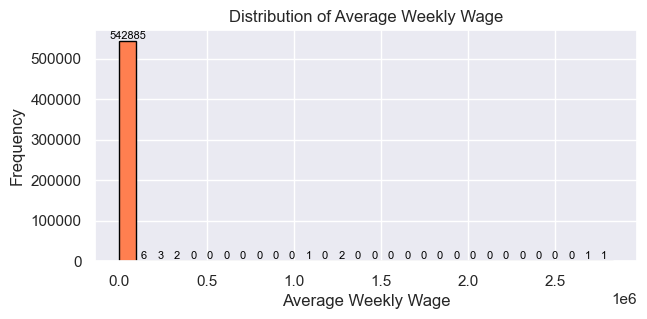

In [161]:
# Continuous Columns: Plotting Histogram with Count Labels Above the Bars
continuous_columns = ['Average Weekly Wage']

for column in continuous_columns:
    plt.figure(figsize=(7, 3))
    # Create histogram and store returned axes
    ax = df[column].plot(kind='hist', bins=30, color='coral', edgecolor='black')
    
    # Add count labels above each bar
    for patch in ax.patches:
        ax.annotate(f'{int(patch.get_height())}', 
                    (patch.get_x() + patch.get_width() / 2, patch.get_height()), 
                    ha='center', va='bottom', fontsize=8, color='black')

    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [162]:
df['Average Weekly Wage'].shape[0]

571445

In [163]:
df[df['Average Weekly Wage'] > 3000.00].shape[0]

5059

Since we have a lot of zeros, we will filtretthe plot.

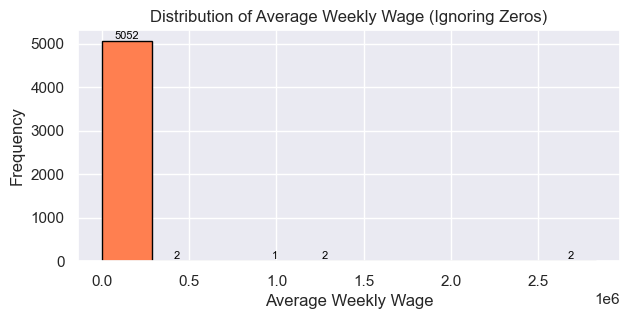

In [164]:
# Continuous Columns: Plotting Histogram with Count Labels Above the Bars, Ignoring Zeros
continuous_columns = ['Average Weekly Wage']

for column in continuous_columns:
    # Filter out rows with value equal to zero
    filtered_data = df[df[column] > 3000.00]

    plt.figure(figsize=(7, 3))
    # Create histogram with filtered data and store returned axes
    ax = filtered_data[column].plot(kind='hist', color='coral', edgecolor='black')
    
    # Add count labels above each bar
    for patch in ax.patches:
        if patch.get_height() > 0:  # Only add labels if count is greater than 0
            ax.annotate(f'{int(patch.get_height())}', 
                        (patch.get_x() + patch.get_width() / 2, patch.get_height()), 
                        ha='center', va='bottom', fontsize=8, color='black')

    plt.title(f'Distribution of {column} (Ignoring Zeros)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

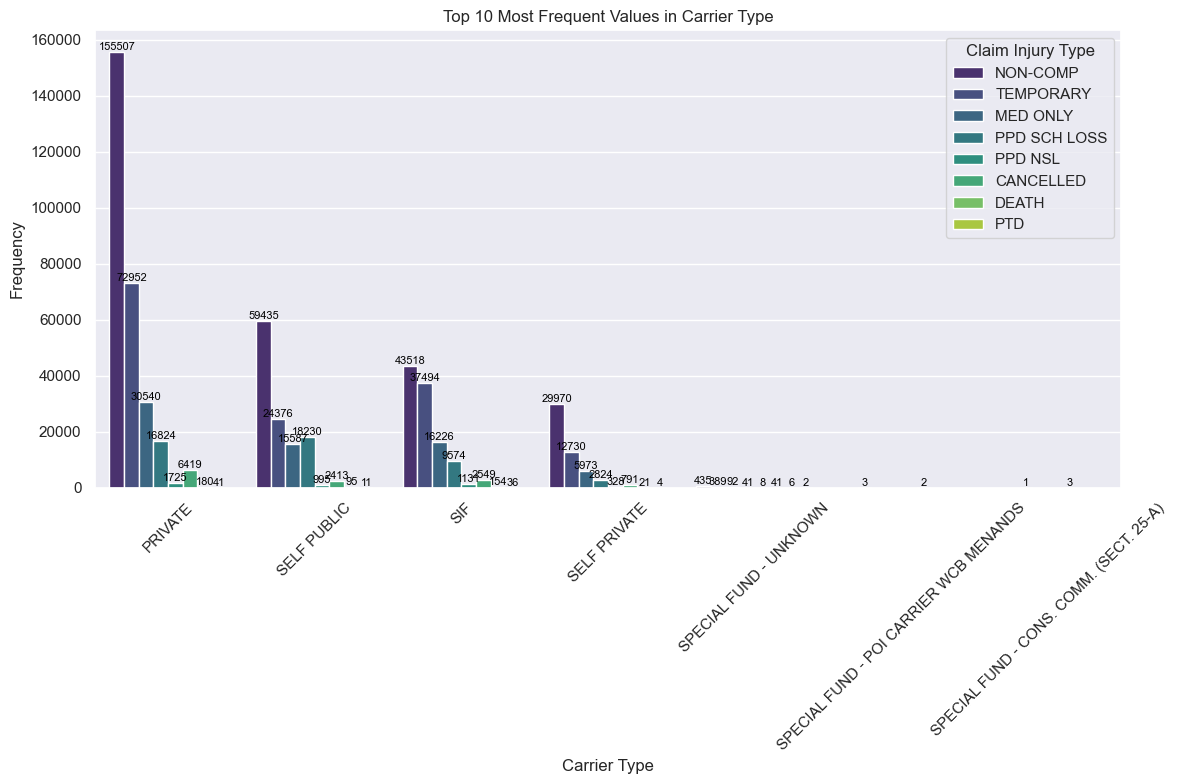

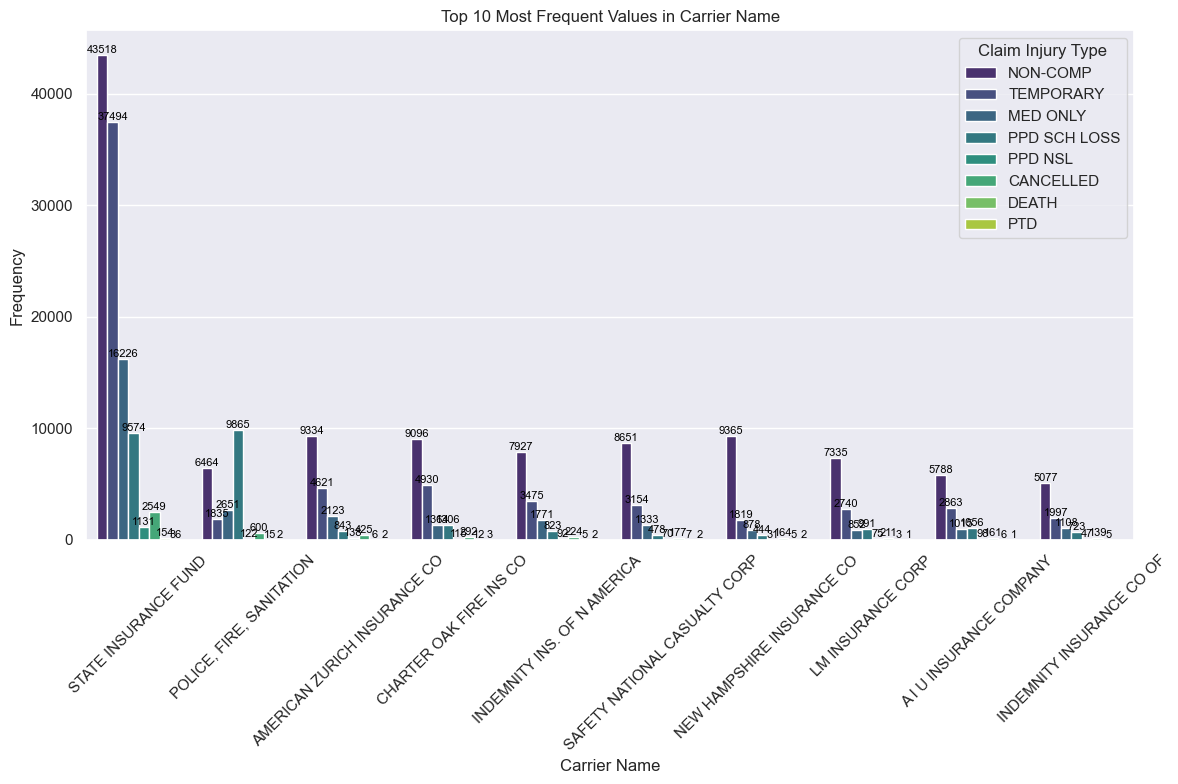

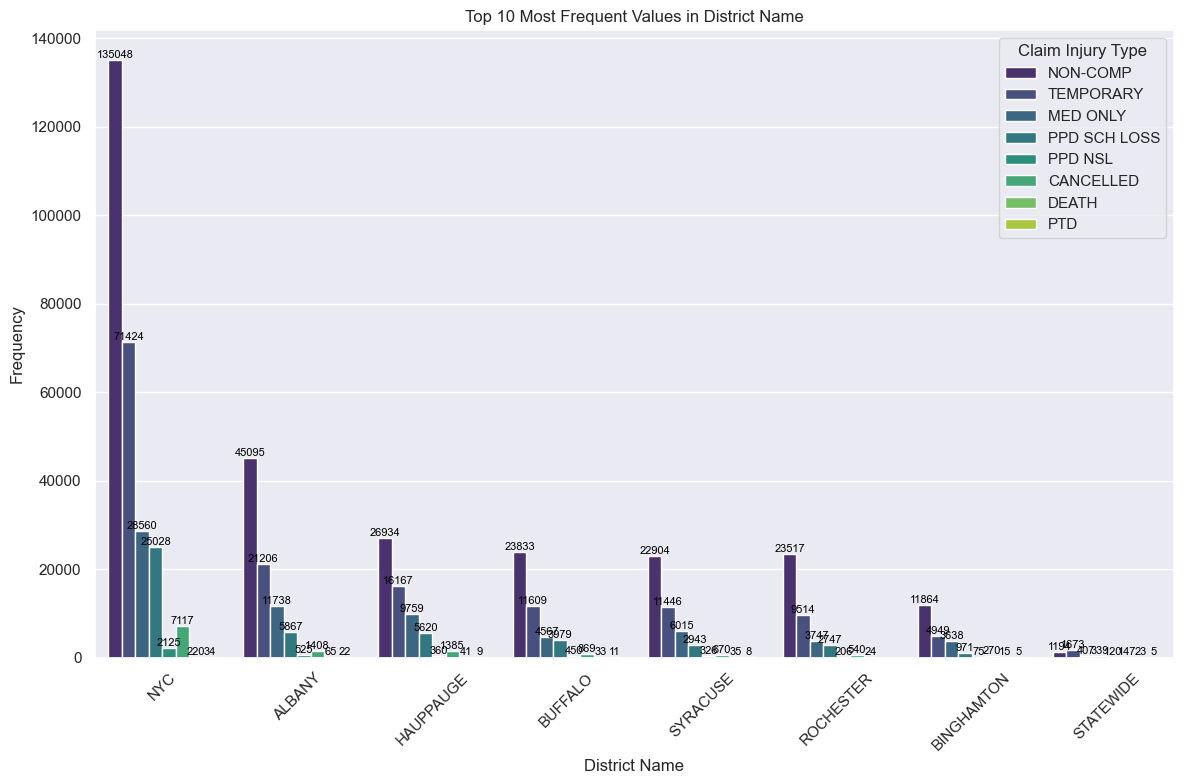

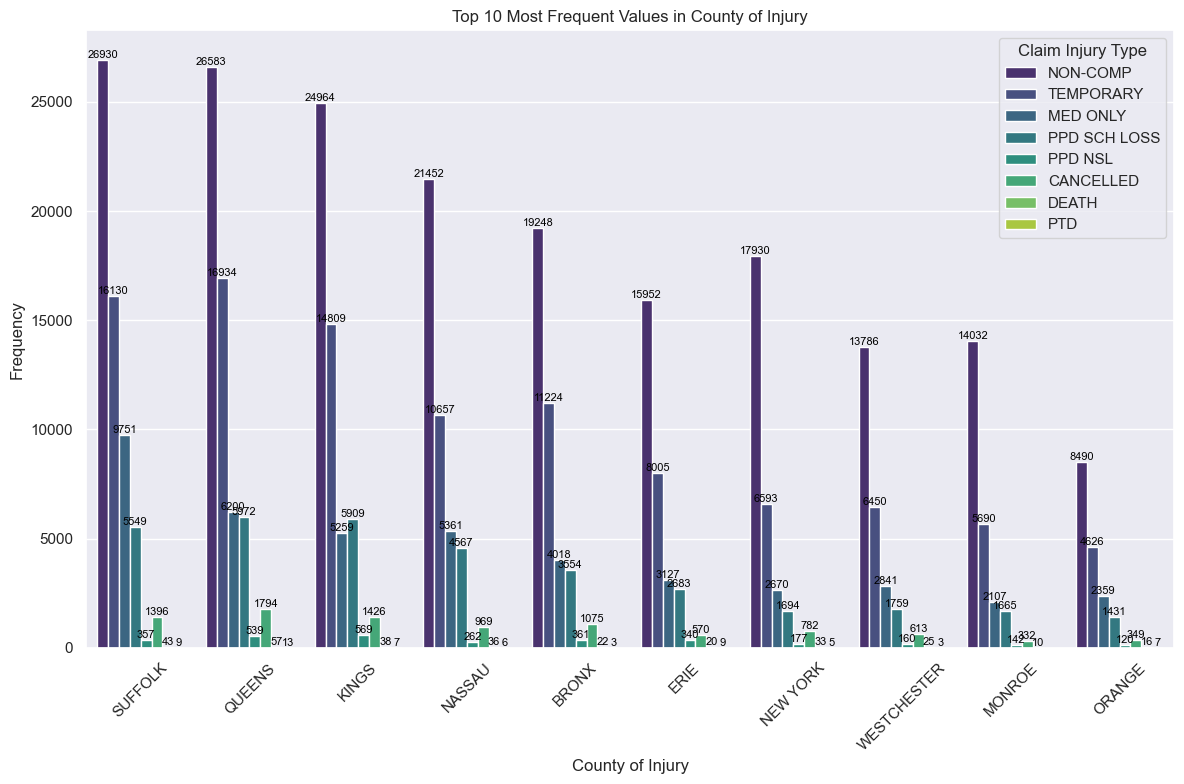

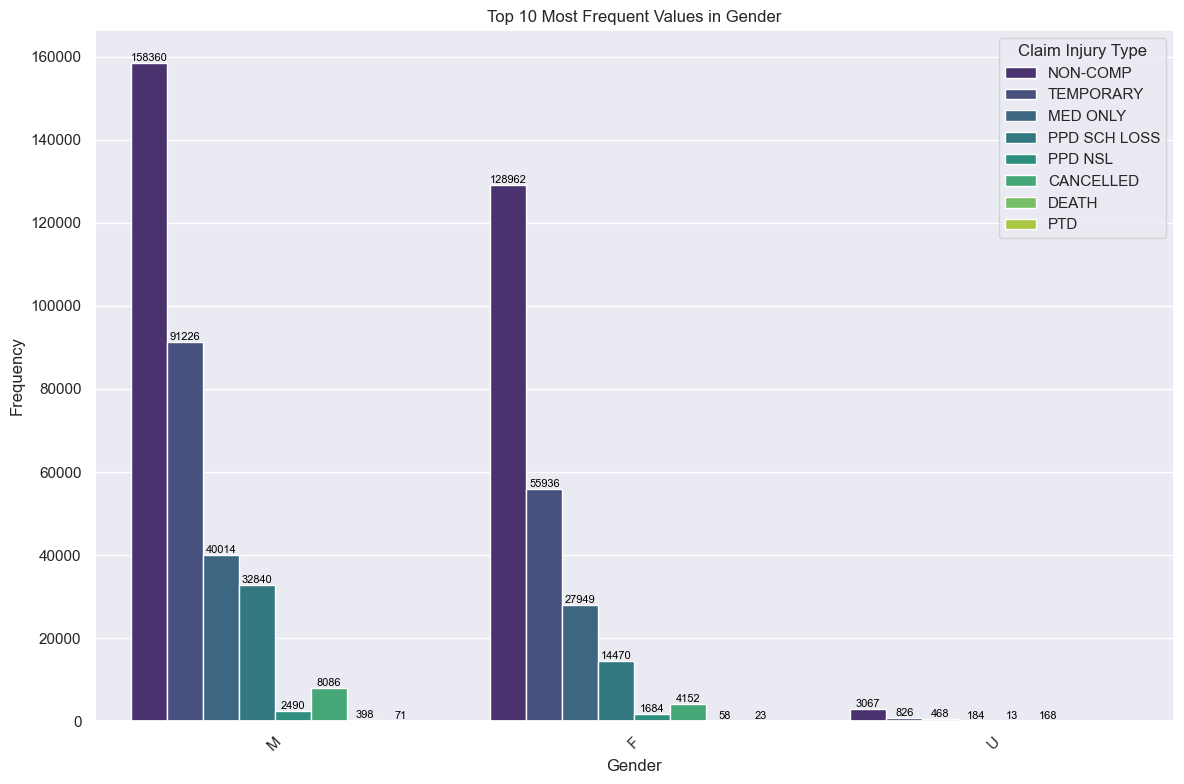

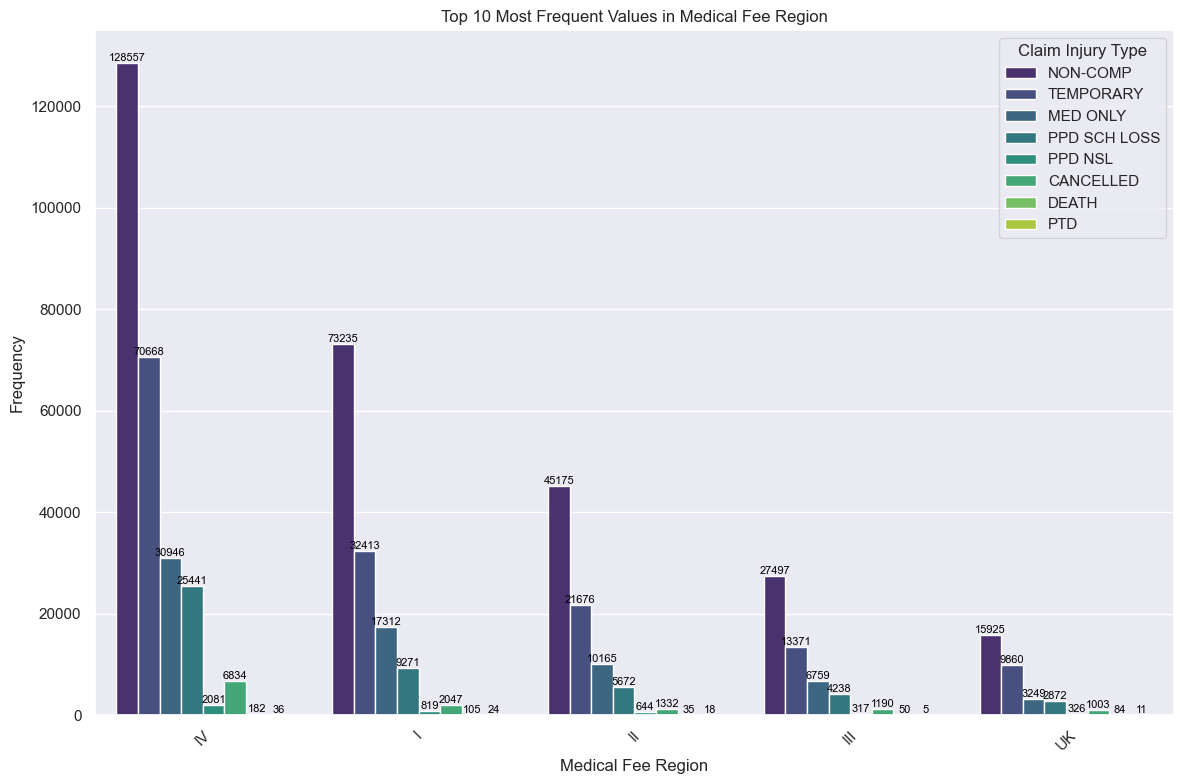

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

# Categorical Columns: Plotting Frequency Distributions with Target as Hue
categorical_columns = ['Carrier Type', 'Carrier Name', 'District Name', 'County of Injury', 'Gender', 'Medical Fee Region']

# Loop through categorical columns and create separate figures
for column in categorical_columns:
    plt.figure(figsize=(12, 8))
    
    # Plot using seaborn to include hue (target column)
    ax = sns.countplot(data=df, x=column, hue='Claim Injury Type', palette='viridis', order=df[column].value_counts().iloc[:10].index)
    
    # Set title and labels
    plt.title(f'Top 10 Most Frequent Values in {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    
    # Add count labels above each bar
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=8, color='black')

    # Show the plot
    plt.tight_layout()
    plt.show()

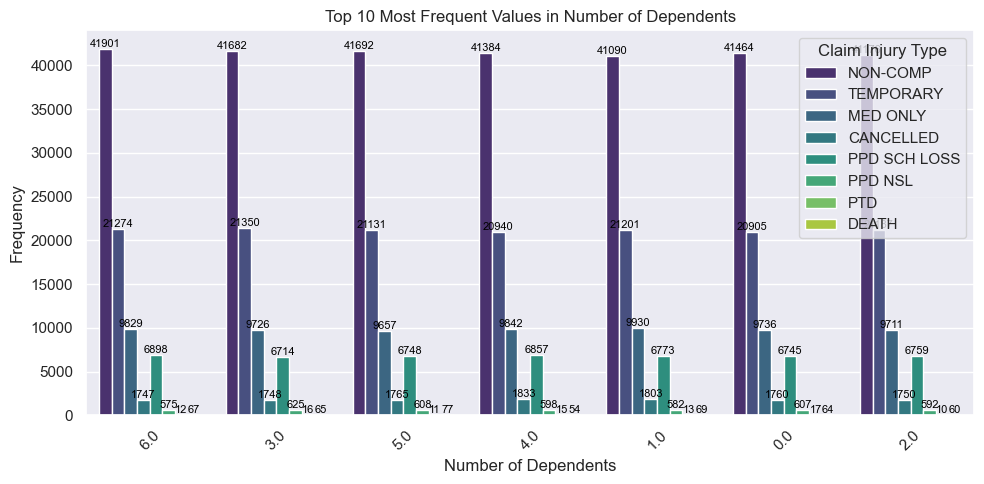

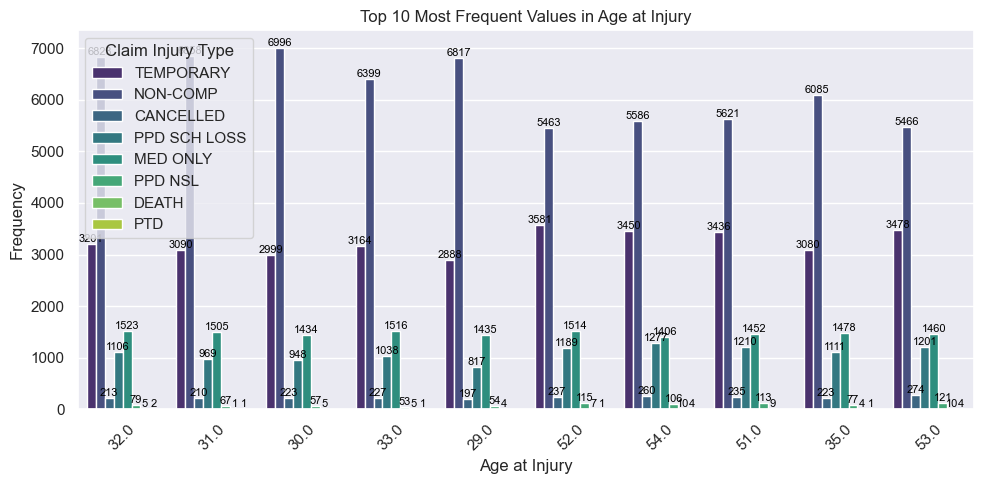

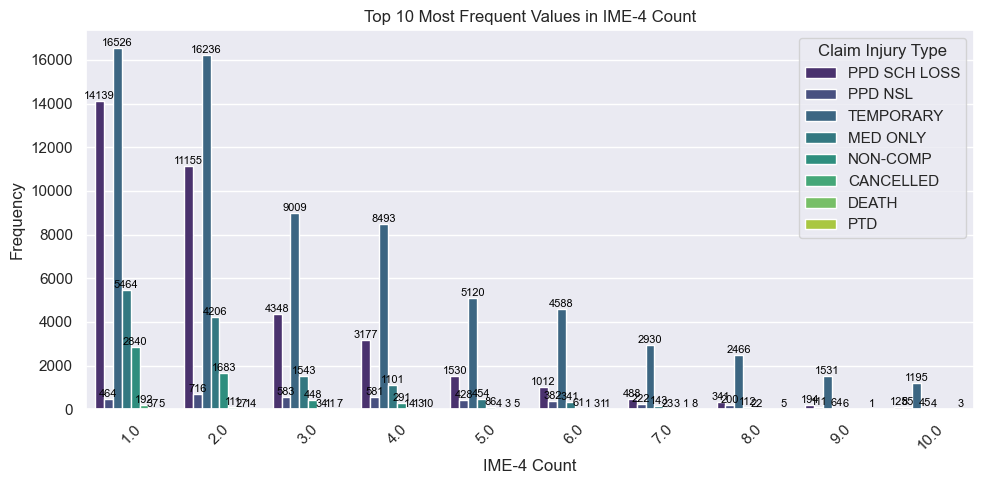

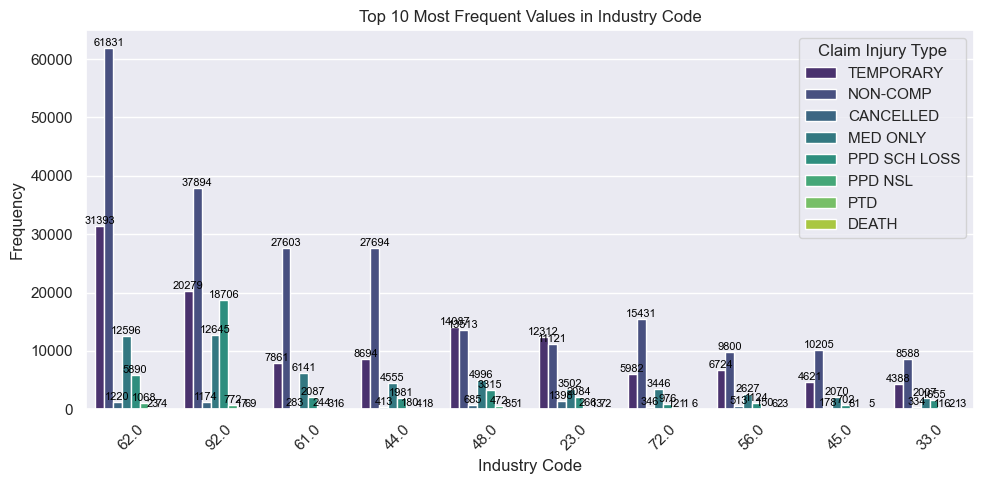

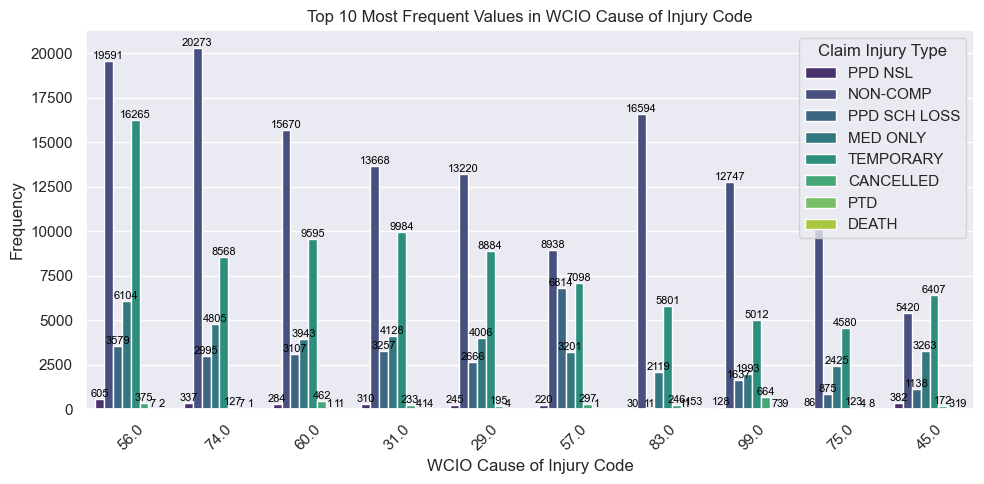

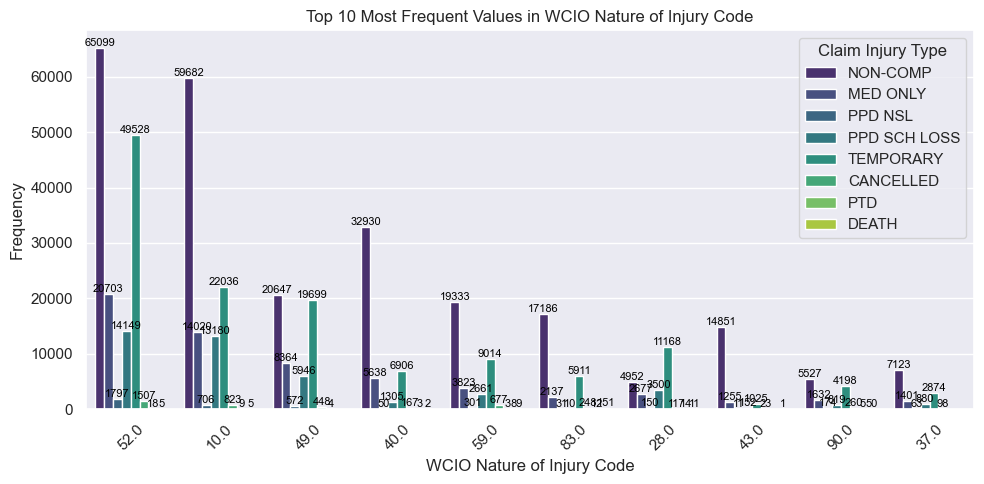

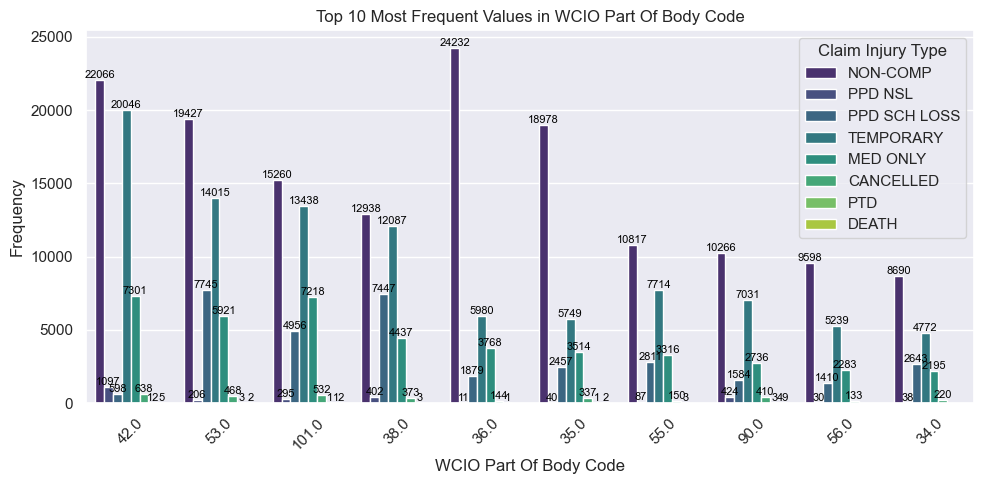

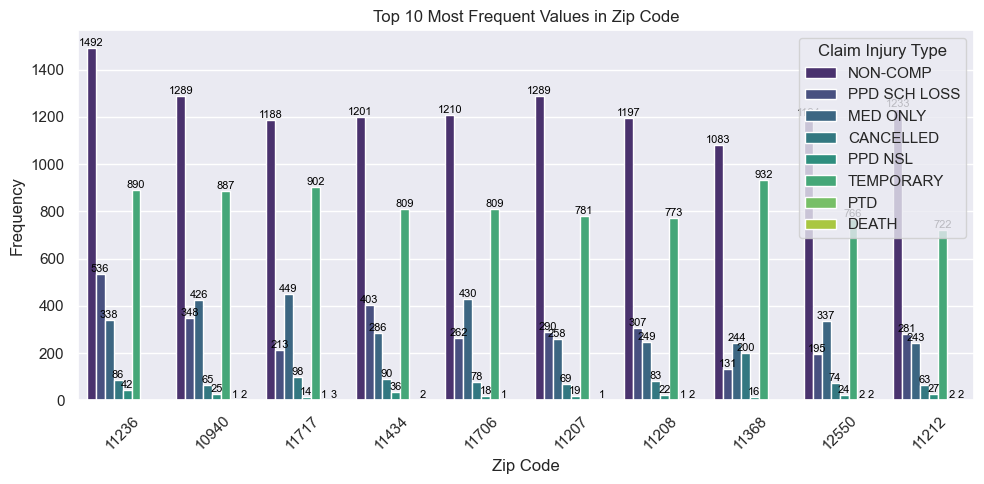

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns

# Discrete Columns: Plotting Top 15 Most Frequent Values with Target as Hue
discrete_columns = ['Number of Dependents', 'Age at Injury', 'IME-4 Count', 'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code']

# Loop through discrete columns and create separate figures
for column in discrete_columns:
    plt.figure(figsize=(10, 5))
    
    # Select the top 10 most frequent values for the current column
    top_10_values = df[column].value_counts().nlargest(10).index
    
    # Plot using seaborn to include hue (target column)
    ax = sns.countplot(data=df[df[column].isin(top_10_values)], x=column, hue='Claim Injury Type', palette='viridis', order=top_10_values)
    
    # Set title and labels
    plt.title(f'Top 10 Most Frequent Values in {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    
    # Add count labels above each bar
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=8, color='black')

    # Show the plot
    plt.tight_layout()
    plt.show()

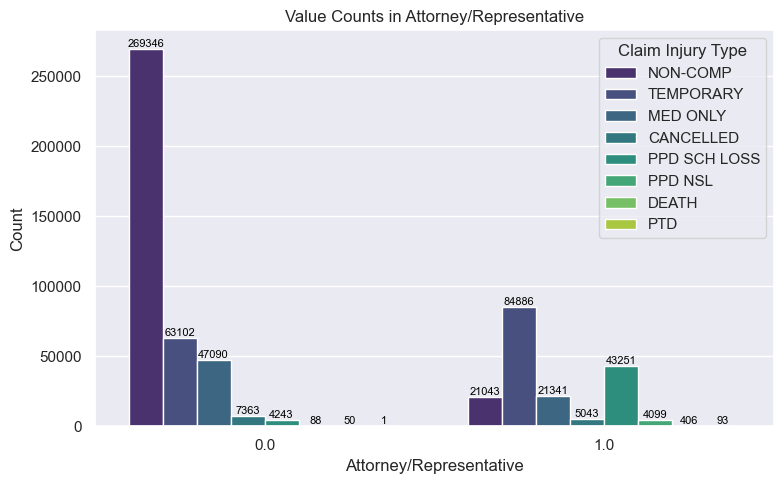

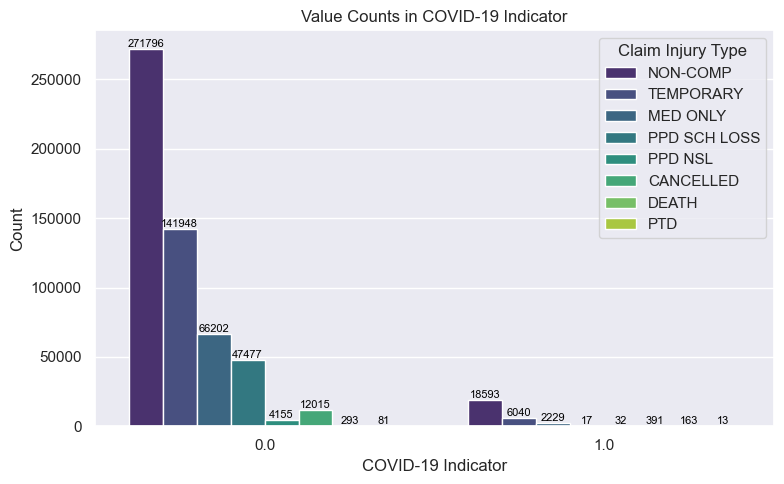

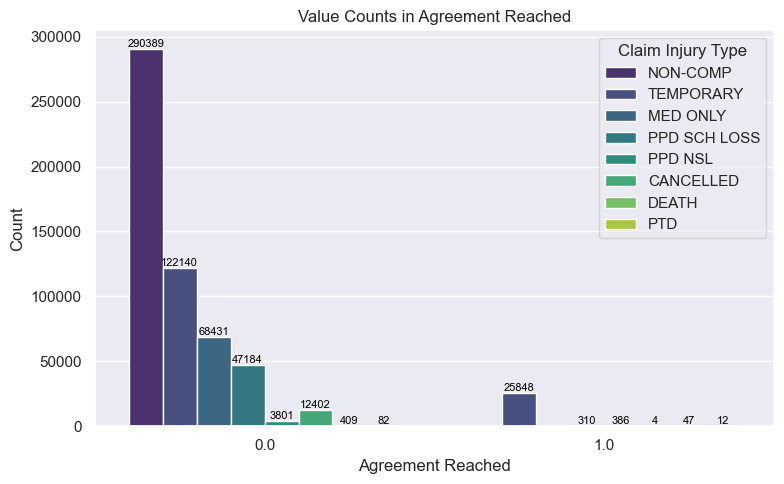

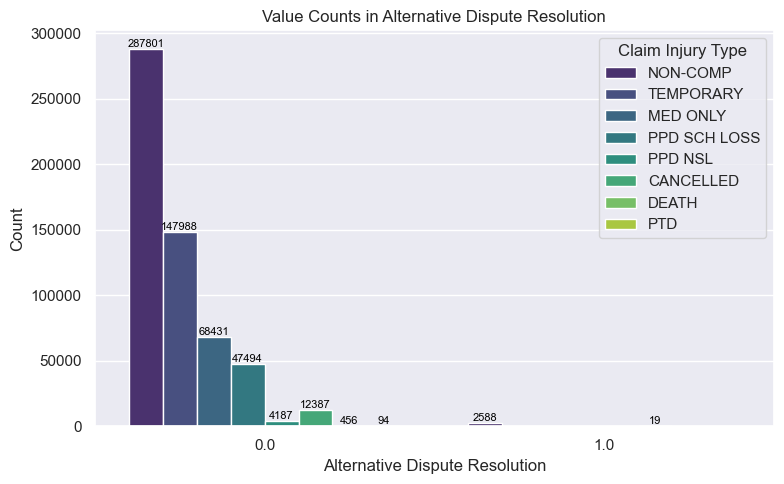

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

# Binary Columns: Plotting Counts of Values with Target as Hue
binary_columns = ['Attorney/Representative', 'COVID-19 Indicator', 'Agreement Reached','Alternative Dispute Resolution']

# Loop through binary columns and create separate figures
for column in binary_columns:
    plt.figure(figsize=(8, 5))
    
    # Plot using seaborn to include hue (target column)
    ax = sns.countplot(data=df, x=column, hue='Claim Injury Type', palette='viridis')
    
    # Set title and labels
    plt.title(f'Value Counts in {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    
    # Add count labels above each bar
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=8, color='black')

    # Show the plot
    plt.tight_layout()
    plt.show()

## Multivariate Analyses 
- Correlação entre várias features 
- Correlação entre elas e o resultado final (Claim Injury Type)

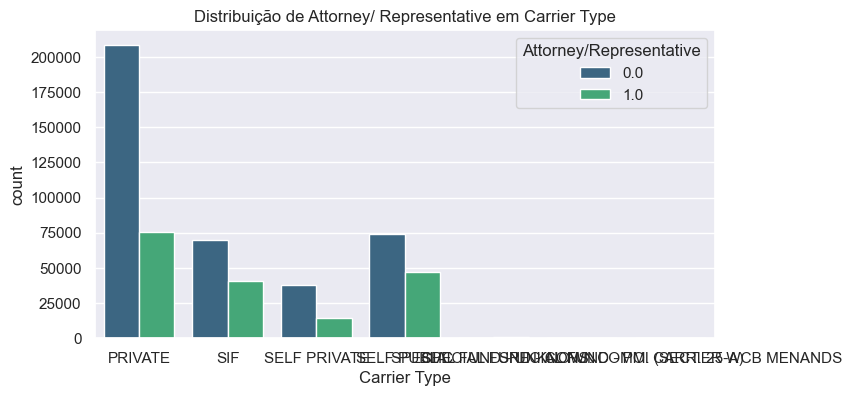

In [176]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Carrier Type', hue='Attorney/Representative', palette='viridis')
plt.title('Distribuição de Attorney/ Representative em Carrier Type')
plt.show()



In [199]:
# Gráfico de dispersão para as variáveis contínuas
sns.pairplot(df[continuous_columns], hue=df['Claim Injury Type'], palette='viridis')
plt.title("Pairplot entre Variáveis Contínuas")
plt.show()

# Heatmap da matriz de correlação
correlation_matrix = df[continuous_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Matriz de Correlação entre Variáveis Contínuas")
plt.show()


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [189]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#import pandas as pd

# Suponha que binary_columns e categorical_columns sejam listas com os nomes das colunas
#for binary_var in binary_columns:
 #   for cat_var in categorical_columns:
        # Criando a tabela de contingência (contagem) entre a variável categórica e binária
  #      contingency_table = pd.crosstab(df[cat_var], df[binary_var])

        # Plotando o heatmap
   #     plt.figure(figsize=(10, 5))
    #    sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', cbar=False)
        
     #   plt.title(f'Distribuição de {binary_var} em {cat_var}')
      #  plt.ylabel(cat_var)
       # plt.xlabel(binary_var)
        #plt.tight_layout()  # Ajusta o layout para evitar sobreposição
        #plt.show()




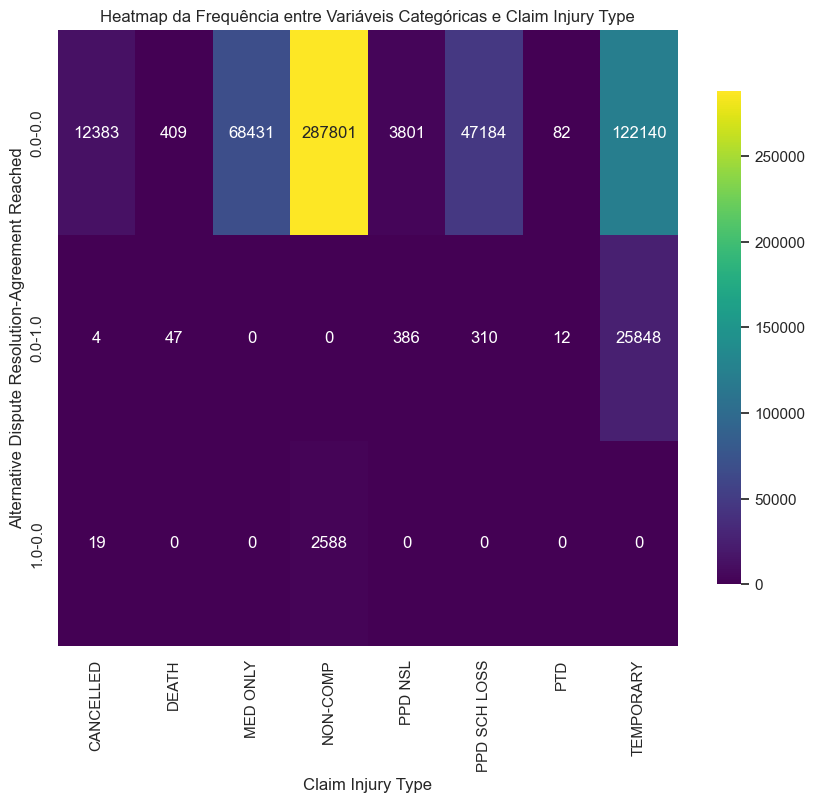

In [183]:
# Suponha que 'Claim Injury Type' seja a variável alvo
# e outras variáveis categóricas sejam de interesse
contingency_table = pd.crosstab([df['Alternative Dispute Resolution'], df['Agreement Reached']], df['Claim Injury Type'])

# Plotar o heatmap da tabela de contingência
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, cmap="viridis", fmt="d", cbar_kws={"shrink": .8})
plt.title("Heatmap da Frequência entre Variáveis Categóricas e Claim Injury Type")
plt.show()


## Acho que este heatmap não é importante

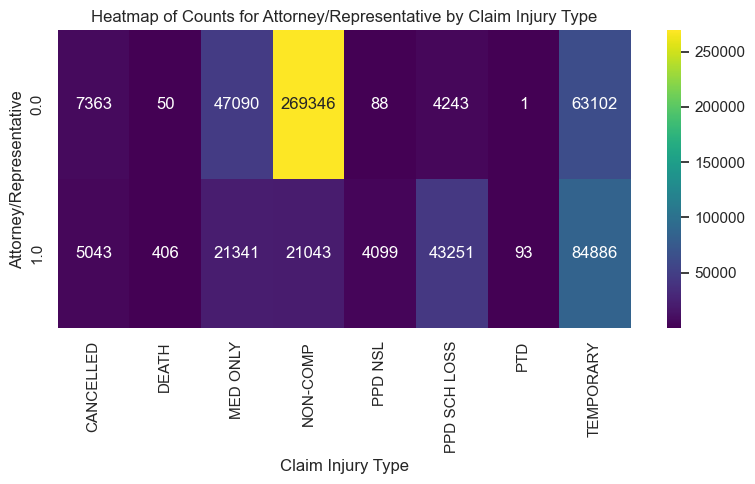

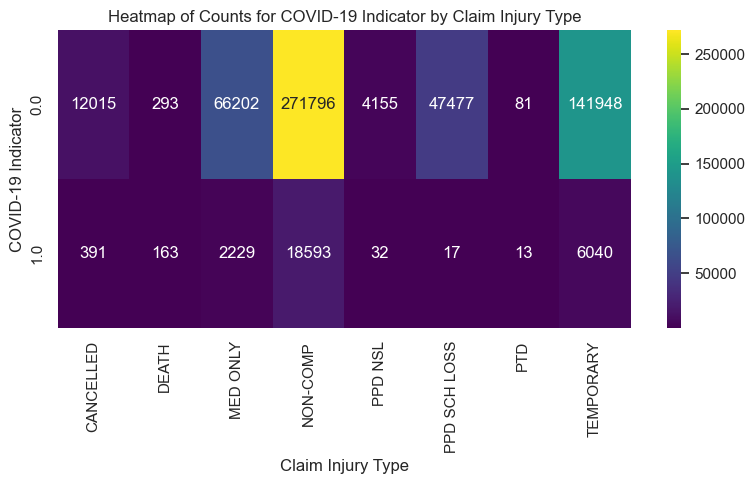

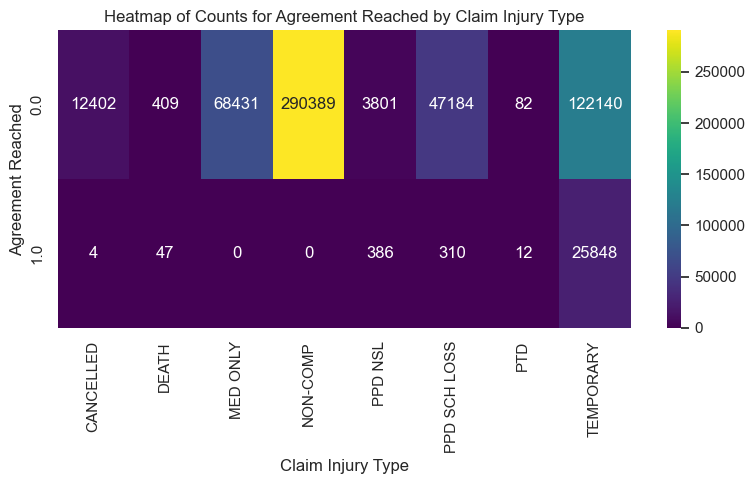

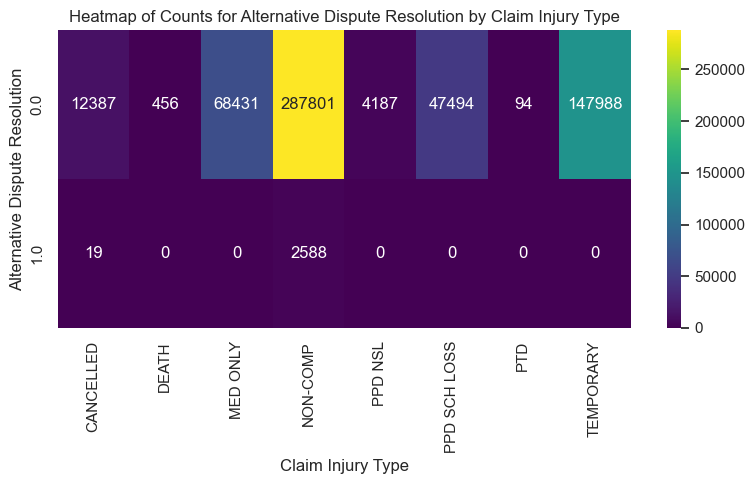

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is already defined and has the binary columns and target
binary_columns = ['Attorney/Representative', 'COVID-19 Indicator', 'Agreement Reached', 'Alternative Dispute Resolution']

# Loop through binary columns and create a heatmap for each
for column in binary_columns:
    plt.figure(figsize=(8, 5))
    
    # Create a pivot table counting the occurrences of each combination
    count_data = df.groupby([column, 'Claim Injury Type']).size().unstack(fill_value=0)
    
    # Plot heatmap with seaborn
    sns.heatmap(count_data, annot=True, fmt="d", cmap="viridis", cbar=True)
    
    # Set title and labels
    plt.title(f'Heatmap of Counts for {column} by Claim Injury Type')
    plt.xlabel('Claim Injury Type')
    plt.ylabel(column)
    
    plt.tight_layout()
    plt.show()


# 4. Train Test Split <a class="anchor" id="chapter4"></a>

Splitting the dataset into training and test sets is a crucial step in building a machine learning model. In this project, we perform the train-test split after correcting inconsistencies but before data preprocessing, such as handling missing values, outlier treatment, and feature scaling. This sequence helps in maintaining the integrity of our data and ensures that the model is trained and evaluated fairly.

The train-test split is performed after fixing inconsistencies but before preprocessing to ensure that we do not inadvertently introduce information from the test set into the training set. This allows us to maintain the integrity of our model evaluation and helps ensure that the results obtained during model evaluation are unbiased and reflect the model’s performance on truly unseen data.


In [ ]:
X= df.drop('Claim Injury Type',axis=1)
y= df['Claim Injury Type']

# Encode o target
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, 
                                                  random_state = 42, 
                                                  stratify = y, 
                                                  shuffle = True)

# 5. Preprocessing the Dataset <a class="anchor" id="chapter5"></a>
In this chapter we will perform the basic steps to get to know our dataset.

## 5.1. Missing Values <a class="anchor" id="section_5_1"></a>


We may also have missing values that are incorrectly set to zero. Therefore, we will use .eq(0) to identify if there are any columns with zeros that are not supposed to have them.

In [ ]:
X_train.eq(0).sum()

Accident Date                          0
Age at Injury                          0
Alternative Dispute Resolution    398131
Assembly Date                          0
Attorney/Representative           273738
Average Weekly Wage               234109
Birth Year                             0
C-2 Date                               0
C-3 Date                               0
Carrier Name                           0
Carrier Type                           0
County of Injury                       0
COVID-19 Indicator                380804
District Name                          0
First Hearing Date                     0
Gender                                 0
IME-4 Count                            0
Industry Code                          0
Medical Fee Region                     0
WCIO Cause of Injury Code              0
WCIO Nature of Injury Code             0
WCIO Part Of Body Code                 0
Zip Code                               0
Agreement Reached                 381395
Number of Depend

In [ ]:
# Set the threshold for zero values (e.g., more than 20% zeros)
threshold = 0.2

# Calculate the percentage of zeros for each column
zero_percentage = X_train.eq(0).mean()

# Filter columns that have more than the threshold of zero values
high_zero_columns = zero_percentage[zero_percentage > threshold]

# Display the columns with their zero percentage
print(high_zero_columns)

Alternative Dispute Resolution    0.995300
Attorney/Representative           0.684326
Average Weekly Wage               0.585256
COVID-19 Indicator                0.951984
Agreement Reached                 0.953461
dtype: float64


We found that only one column, Average Weekly Wage, contains an unexpectedly high number of zeros. Since this dataset is related to work insurance, every employee must have a weekly wage, meaning these zeros are likely incorrect and should be treated as missing values. Therefore, we will replace the zeros in the Average Weekly Wage column with NaN.

In [ ]:
X_train['Average Weekly Wage'] = X_train['Average Weekly Wage'].replace(0, np.nan)

#Apply also to val
X_val['Average Weekly Wage'] = X_val['Average Weekly Wage'].replace(0, np.nan)

# Apply to the test set
df_test['Average Weekly Wage'] = df_test['Average Weekly Wage'].replace(0, np.nan)

Now that we have addressed the Average Weekly Wage feature by treating zeros as missing values, we will proceed to examine the dataset for any remaining NaN values.

In [ ]:
X_train.isnull().sum()

Accident Date                       2608
Age at Injury                      40147
Alternative Dispute Resolution         0
Assembly Date                          0
Attorney/Representative                0
Average Weekly Wage               254103
Birth Year                         37902
C-2 Date                           10257
C-3 Date                          269842
Carrier Name                           0
Carrier Type                        1255
County of Injury                       0
COVID-19 Indicator                     0
District Name                          0
First Hearing Date                295575
Gender                                 0
IME-4 Count                       307873
Industry Code                       6941
Medical Fee Region                     0
WCIO Cause of Injury Code          10990
WCIO Nature of Injury Code         11001
WCIO Part Of Body Code             12009
Zip Code                           20312
Agreement Reached                      0
Number of Depend

In [ ]:
# Set the threshold for missing values (e.g., more than 30% missing)
threshold = 0.2

# Calculate the percentage of missing values for each column
missing_percentage = X_train.isnull().mean()

# Filter columns that have more than the threshold of missing values
high_missing_columns = missing_percentage[missing_percentage > threshold]

# Display the columns with their missing percentage
print(high_missing_columns)

Average Weekly Wage    0.635240
C-3 Date               0.674586
First Hearing Date     0.738917
IME-4 Count            0.769661
dtype: float64


Based on the dataset description, the First Hearing Date feature contains missing values represented by NaN, but these values are meaningful, so we have decided not to remove this feature from the dataset. Since more than 70% of the entries are missing, we may consider creating a binary variable during feature engineering—e.g., 0 for NaN values and 1 otherwise.

Let's explore more about the rest of missing values.

> IME-4

In [ ]:
X_train['IME-4 Count'].unique()

array([nan,  2.,  4.,  5., 10.,  1., 15.,  3.,  8.,  7.,  6., 11., 12.,
       14.,  9., 27., 17., 19., 18., 13., 20., 16., 36., 29., 21., 22.,
       23., 24., 26., 32., 25., 34., 47., 30., 28., 33., 39., 37., 73.])

As IME-4 represents the number of independent medical audicts examination we decided to convert nan to 0 meaning that there wasn't any.

In [ ]:
X_train['IME-4 Count'].fillna(0, inplace=True)

#Apply to the val set
X_val['IME-4 Count'].fillna(0, inplace=True)

# Apply to the test set
df_test['IME-4 Count'].fillna(0, inplace=True)

X_train['IME-4 Count'].unique()

array([ 0.,  2.,  4.,  5., 10.,  1., 15.,  3.,  8.,  7.,  6., 11., 12.,
       14.,  9., 27., 17., 19., 18., 13., 20., 16., 36., 29., 21., 22.,
       23., 24., 26., 32., 25., 34., 47., 30., 28., 33., 39., 37., 73.])

> C-3 Date


We decided to drop C-3 Date based on the threshold that we pre defined meaning those features don't have enough predictive power based on the amount of missing information.


In [ ]:
X_train = X_train.drop('C-3 Date', axis=1)

#Apply to the val set
X_val = X_val.drop('C-3 Date', axis=1)

# Apply to the test set
df_test = df_test.drop('C-3 Date', axis=1)

> Average Weekly Wage

For now, we will impute the missing values from Average Weekly Wage based on the Industry Code



In [ ]:
# Calculate the mean of 'Average Weekly Wage' for each 'Industry Code' in the training dataset
industry_means_train = X_train.groupby('Industry Code')['Average Weekly Wage'].mean()

# Define a function to fill missing values based on 'Industry Code' using training means
def impute_average_weekly_wage(row):
    if pd.isnull(row['Average Weekly Wage']):
        return industry_means_train.get(row['Industry Code'], row['Average Weekly Wage'])
    return row['Average Weekly Wage']

# Apply the function to fill missing values in 'Average Weekly Wage' for X_train, X_val, and X_test
X_train['Average Weekly Wage'] = X_train.apply(impute_average_weekly_wage, axis=1)
X_val['Average Weekly Wage'] = X_val.apply(impute_average_weekly_wage, axis=1)
df_test['Average Weekly Wage'] = df_test.apply(impute_average_weekly_wage, axis=1)

> Zip Code


Imputing the Zip Code based on Country of Injury and District Name



In [ ]:
# Calculate the mode of 'Zip Code' for each ('County of Injury', 'District Name') pair in the training dataset
zip_code_mode_train = X_train.groupby(['County of Injury', 'District Name'])['Zip Code'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Define a function to impute 'Zip Code' based on 'County of Injury' and 'District Name' using training mode
def impute_zip_code(row):
    if pd.isna(row['Zip Code']):
        # Get the mode of the zip code for the given county and district from training set
        return zip_code_mode_train.get((row['County of Injury'], row['District Name']), row['Zip Code'])
    return row['Zip Code']

# Apply the imputation function to 'Zip Code' for X_train, X_val, and X_test
X_train['Zip Code'] = X_train.apply(impute_zip_code, axis=1)
X_val['Zip Code'] = X_val.apply(impute_zip_code, axis=1)
df_test['Zip Code'] = df_test.apply(impute_zip_code, axis=1)

> Industry Code

Imputing the Industry Code based on carrier name and carrier type

In [ ]:
# Calculate the mode of 'Industry Code' for each ('Carrier Name', 'Carrier Type') pair in the training dataset
industry_code_mode_train = X_train.groupby(['Carrier Name', 'Carrier Type'])['Industry Code'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Define a function to impute 'Industry Code' based on 'Carrier Name' and 'Carrier Type' using training mode
def impute_industry_code(row):
    if pd.isna(row['Industry Code']):
        # Get the mode of the industry code for the given carrier name and carrier type from training set
        return industry_code_mode_train.get((row['Carrier Name'], row['Carrier Type']), row['Industry Code'])
    return row['Industry Code']

# Apply the imputation function to 'Industry Code' for X_train, X_val, and df_test
X_train['Industry Code'] = X_train.apply(impute_industry_code, axis=1)
X_val['Industry Code'] = X_val.apply(impute_industry_code, axis=1)
df_test['Industry Code'] = df_test.apply(impute_industry_code, axis=1)

> Assembly Date

Imputing the Industry Code based on carrier name and carrier type

In [ ]:
# Ensure 'Assembly Date' is in datetime format for all datasets
X_train['Assembly Date'] = pd.to_datetime(X_train['Assembly Date'], errors='coerce')
X_val['Assembly Date'] = pd.to_datetime(X_val['Assembly Date'], errors='coerce')
df_test['Assembly Date'] = pd.to_datetime(df_test['Assembly Date'], errors='coerce')

# Define a function to impute 'Birth Year' based on 'Assembly Date' and 'Age at Injury'
def impute_birth_year(row):
    if pd.isna(row['Birth Year']):
        if pd.notna(row['Assembly Date']) and pd.notna(row['Age at Injury']):
            # Calculate birth year by subtracting age at injury from assembly year
            assembly_year = row['Assembly Date'].year
            return float(assembly_year - row['Age at Injury'])
    return row['Birth Year']

# Apply the imputation function to 'Birth Year' for X_train, X_val, and df_test
X_train['Birth Year'] = X_train.apply(impute_birth_year, axis=1)
X_val['Birth Year'] = X_val.apply(impute_birth_year, axis=1)
df_test['Birth Year'] = df_test.apply(impute_birth_year, axis=1)

> Age at Injury

In [ ]:
# Calculate 'Age at Injury' for X_train, X_val, and df_test based on 'Accident Year' and 'Birth Year'
X_train['Age at Injury'] = X_train['Accident Year'] - X_train['Birth Year']
X_val['Age at Injury'] = X_val['Accident Year'] - X_val['Birth Year']
df_test['Age at Injury'] = df_test['Accident Year'] - df_test['Birth Year']


'Age at Injury' captures the relevant information, then it makes sense to drop 'Birth Year' to avoid redundancy and potential multicollinearity.

In [ ]:
# Drop 'Birth Year' from X_train, X_val, and df_test
X_train = X_train.drop(columns=['Birth Year'])
X_val = X_val.drop(columns=['Birth Year'])
df_test = df_test.drop(columns=['Birth Year'])

In [ ]:
missing_percentage = X_train.isnull().mean() * 100
missing_percentage

Accident Date                      0.651982
Age at Injury                     10.036474
Alternative Dispute Resolution     0.000000
Assembly Date                      0.000000
Attorney/Representative            0.000000
Average Weekly Wage                1.691703
C-2 Date                           2.564179
Carrier Name                       0.000000
Carrier Type                       0.313741
County of Injury                   0.000000
COVID-19 Indicator                 0.000000
District Name                      0.000000
First Hearing Date                73.891718
Gender                             0.000000
IME-4 Count                        0.000000
Industry Code                      0.208494
Medical Fee Region                 0.000000
WCIO Cause of Injury Code          2.747424
WCIO Nature of Injury Code         2.750174
WCIO Part Of Body Code             3.002167
Zip Code                           0.001000
Agreement Reached                  0.000000
Number of Dependents            

Let's check how many more missing values in percentage do we have

In [ ]:
# Identify rows with missing values, excluding 'First Hearing Date'
missing_values = X_train[X_train.columns.difference(['First Hearing Date'])].isna().any(axis=1)

# Calculate the percentage of rows that have missing values (excluding 'First Hearing Date')
percentage_missing = (missing_values.sum() / len(X_train)) * 100

# Print the percentage of rows with missing values
print(f"Percentage of rows with missing values (excluding 'First Hearing Date'): {percentage_missing:.2f}%")


Percentage of rows with missing values (excluding 'First Hearing Date'): 12.53%


Let's check also if we exclude the Age at Injury.

In [ ]:
# Identify rows with missing values, excluding 'First Hearing Date'
missing_values = X_train[X_train.columns.difference(['First Hearing Date','Age at Injury'])].isna().any(axis=1)

# Calculate the percentage of rows that have missing values (excluding 'First Hearing Date')
percentage_missing = (missing_values.sum() / len(X_train)) * 100

# Print the percentage of rows with missing values
print(f"Percentage of rows with missing values (excluding 'First Hearing Date'): {percentage_missing:.2f}%")


Percentage of rows with missing values (excluding 'First Hearing Date'): 3.71%


## we can consider this: We decrease a lot the percentage of rows with missing values, so, for this motive we will delete the variable Age at Injury.

In [ ]:
# #Drop Age at Injury from the train, val and test set
# X_train = X_train.drop(columns=['Age at Injury'])
# X_val = X_val.drop(columns=['Age at Injury'])
# df_test = df_test.drop(columns=['Age at Injury'])

In [ ]:
# Identify rows with missing values, excluding 'First Hearing Date'
missing_values = X_train[X_train.columns.difference(['First Hearing Date'])].isna().any(axis=1)

# Calculate the percentage of rows that have missing values (excluding 'First Hearing Date')
percentage_missing = (missing_values.sum() / len(X_train)) * 100

# Print the percentage of rows with missing values
print(f"Percentage of rows with missing values (excluding 'First Hearing Date'): {percentage_missing:.2f}%")

Percentage of rows with missing values (excluding 'First Hearing Date'): 12.53%


Since only 3.72% of the values are missing, we decided to use KNNImputer to fill in these missing values. It’s important to note that we are not including 'First Hearing Date' in this imputation, as missing values in this column have a specific meaning. We plan to create a new feature based on the presence or absence of 'First Hearing Date' as part of the feature engineering process, after which the original column will be dropped.

In [ ]:
# Create copies of the datasets to avoid modifying the original
X_train_copy = X_train.copy()
X_val_copy = X_val.copy()
df_test_copy = df_test.copy()

# Drop the column 'Agreement Reached' if it's not in the test set
columns_to_drop = ['Agreement Reached']
X_train_copy.drop(columns=columns_to_drop, errors='ignore', inplace=True)
X_val_copy.drop(columns=columns_to_drop, errors='ignore', inplace=True)

# Columns to be imputed using mode, excluding 'First Hearing Date'
columns_to_impute = X_train_copy.columns.difference(['First Hearing Date'])

# Mode imputation for each column (using mode of X_train)
for col in columns_to_impute:
    if col in X_train_copy.columns:  # Ensure the column exists in X_train_copy
        mode_value = X_train_copy[col].mode()[0]  # Calculate mode from the training set
        
        # Apply mode imputation to X_train, X_val, and df_test
        X_train_copy[col].fillna(mode_value, inplace=True)
        X_val_copy[col].fillna(mode_value, inplace=True)
        if col in df_test_copy.columns:  # Ensure the column exists in df_test_copy
            df_test_copy[col].fillna(mode_value, inplace=True)

# Final dataframes after mode imputation
X_train_processed = X_train_copy
X_val_processed = X_val_copy
df_test_processed = df_test_copy

# Print confirmation
print("Missing values imputed using mode, excluding 'First Hearing Date'. Columns were aligned across datasets.")


Missing values imputed using mode, excluding 'First Hearing Date'. Columns were aligned across datasets.


In [ ]:
X_train_processed.isnull().mean() * 100

Accident Date                      0.000000
Age at Injury                      0.000000
Alternative Dispute Resolution     0.000000
Assembly Date                      0.000000
Attorney/Representative            0.000000
Average Weekly Wage                0.000000
C-2 Date                           0.000000
Carrier Name                       0.000000
Carrier Type                       0.000000
County of Injury                   0.000000
COVID-19 Indicator                 0.000000
District Name                      0.000000
First Hearing Date                73.891718
Gender                             0.000000
IME-4 Count                        0.000000
Industry Code                      0.000000
Medical Fee Region                 0.000000
WCIO Cause of Injury Code          0.000000
WCIO Nature of Injury Code         0.000000
WCIO Part Of Body Code             0.000000
Zip Code                           0.000000
Number of Dependents               0.000000
Accident Year                   

In [ ]:
X_val_processed.isnull().mean() * 100

Accident Date                      0.000000
Age at Injury                      0.000000
Alternative Dispute Resolution     0.000000
Assembly Date                      0.000000
Attorney/Representative            0.000000
Average Weekly Wage                0.000000
C-2 Date                           0.000000
Carrier Name                       0.000000
Carrier Type                       0.000000
County of Injury                   0.000000
COVID-19 Indicator                 0.000000
District Name                      0.000000
First Hearing Date                73.858161
Gender                             0.000000
IME-4 Count                        0.000000
Industry Code                      0.000000
Medical Fee Region                 0.000000
WCIO Cause of Injury Code          0.000000
WCIO Nature of Injury Code         0.000000
WCIO Part Of Body Code             0.000000
Zip Code                           0.000000
Number of Dependents               0.000000
Accident Year                   

In [ ]:
df_test_processed.isnull().mean() * 100

Accident Date                      0.000000
Age at Injury                      0.000000
Alternative Dispute Resolution     0.000000
Assembly Date                      0.000000
Attorney/Representative            0.000000
Average Weekly Wage                0.000000
C-2 Date                           0.000000
Carrier Name                       0.000000
Carrier Type                       0.000000
County of Injury                   0.000000
COVID-19 Indicator                 0.000000
District Name                      0.000000
First Hearing Date                88.909566
Gender                             0.000000
IME-4 Count                        0.000000
Industry Code                      0.000000
Medical Fee Region                 0.000000
WCIO Cause of Injury Code          0.000000
WCIO Nature of Injury Code         0.000000
WCIO Part Of Body Code             0.000000
Zip Code                           0.000000
Number of Dependents               0.000000
Accident Year                   

In [ ]:
X_train_processed.shape[0]

400011

In [ ]:
X_train.shape[0]

400011

In [ ]:
# Calculate the number of rows deleted
rows_deleted = X_train_processed.shape[0] - X_train.shape[0]

# Print the percentage of rows removed
print(f"Percentage of rows deleted: {(rows_deleted / X_train_processed.shape[0]) * 100:.2f}%")

Percentage of rows deleted: 0.00%


## 5.2. Outliers <a class="anchor" id="section_5_2"></a>


Honestly idk how to do this part, the box plot only makes sense for the Avg Weekly age, because the rest is discrete.

In [ ]:
# # Define metric and non-metric features
# metric_features = df_cleaned.select_dtypes(include=['number']).columns.tolist()
# non_metric_features = df_cleaned.select_dtypes(exclude=['number']).columns.tolist()

# # Output the results
# print(f"Non-metric features: {non_metric_features}")
# print(f"Metric features: {metric_features}")

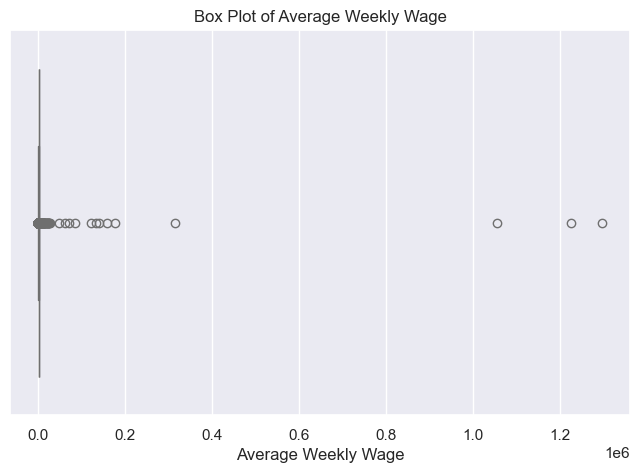

In [ ]:
# Plotting Box Plots for Continuous Columns
for column in continuous_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=X_train_processed, x=column, color='skyblue')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

In [ ]:
discrete_columns

['Number of Dependents',
 'Age at Injury',
 'IME-4 Count',
 'Industry Code',
 'WCIO Cause of Injury Code',
 'WCIO Nature of Injury Code',
 'WCIO Part Of Body Code',
 'Zip Code']

In [ ]:
discrete_columns= ['Number of Dependents',
 'IME-4 Count',
 'Industry Code',
 'WCIO Cause of Injury Code',
 'WCIO Nature of Injury Code',
 'WCIO Part Of Body Code']

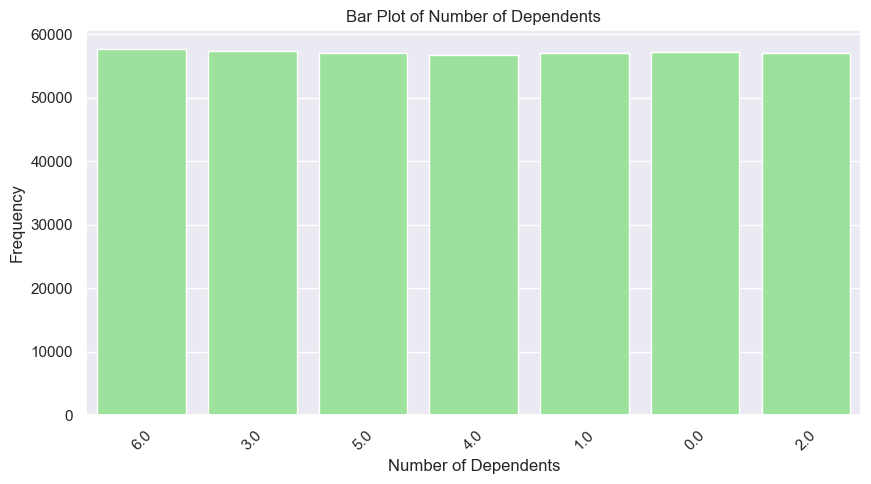

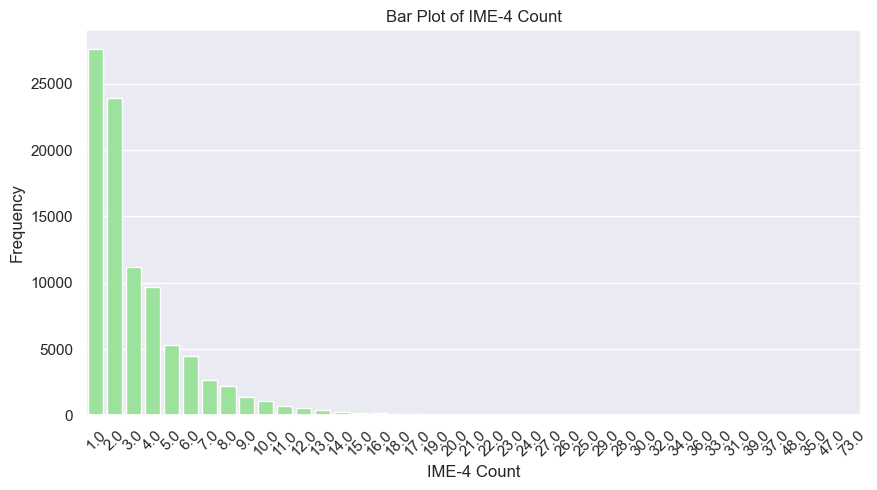

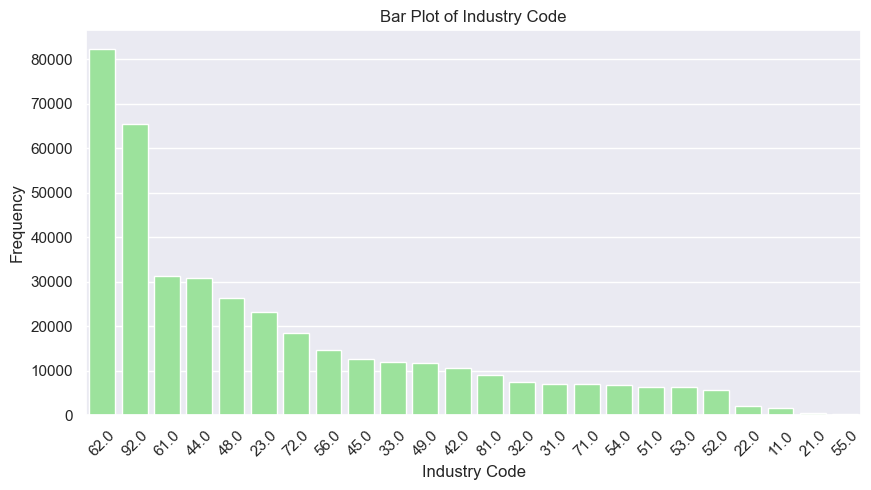

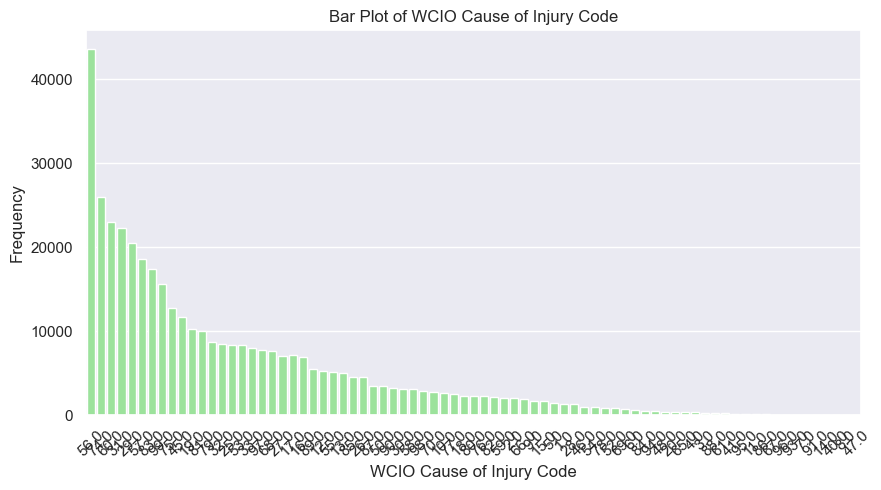

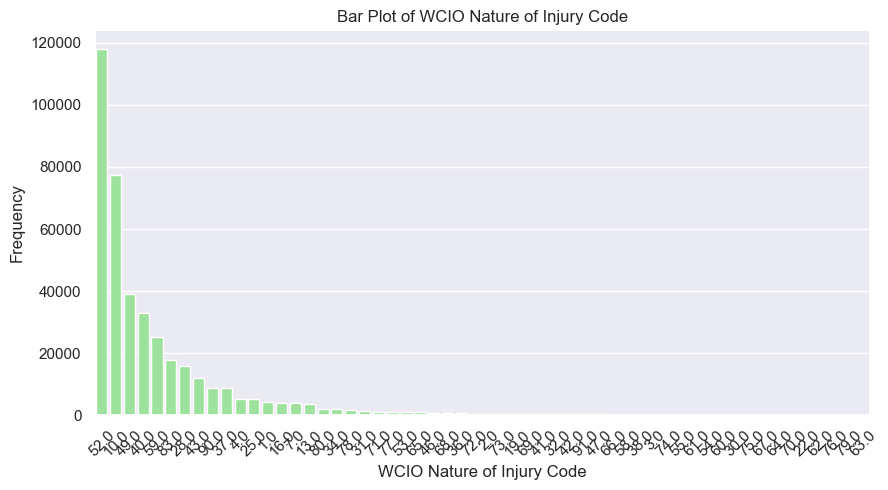

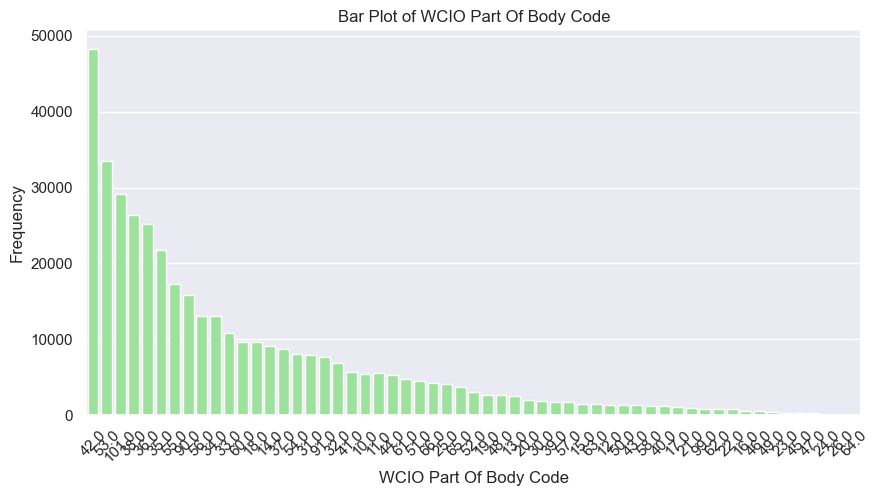

In [ ]:
# Plotting Bar Plots for Discrete Columns
for column in discrete_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=X_train_processed, x=column, color='lightgreen', order=df[column].value_counts().index)
    plt.title(f'Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

Also here we can really calculate the interquantile range and blablabla and explore more the outliers
Do we have outliers? the only one i can see is the Avg Weekly age.But we have so many problems with these column ahahah, maybe we can create some feature with the range of avg weekly age, for example, categories:
- low income
- avg
- high income.

In [ ]:
# FUNÇÃO DOS OUTLIERS (isto em princípio é util mas depois vemos isto)

def detect_outliers(df):
    outliers_indices = set()
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outlier_data = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        outliers_indices.update(outlier_data.index)

        # Print the number of outliers
        print(f'Column: {column} - Number of Outliers: {len(outlier_data)}')
        print(f'Column: {column} - % of Outliers: {len(outlier_data) / len(df) * 100}% \n') 

    return outliers_indices       

In [ ]:
iqr = detect_outliers(X_train_processed)
iqr

Column: Age at Injury - Number of Outliers: 0
Column: Age at Injury - % of Outliers: 0.0% 

Column: Alternative Dispute Resolution - Number of Outliers: 1880
Column: Alternative Dispute Resolution - % of Outliers: 0.4699870753554277% 

Column: Attorney/Representative - Number of Outliers: 0
Column: Attorney/Representative - % of Outliers: 0.0% 

Column: Average Weekly Wage - Number of Outliers: 32971
Column: Average Weekly Wage - % of Outliers: 8.242523330608408% 

Column: COVID-19 Indicator - Number of Outliers: 19207
Column: COVID-19 Indicator - % of Outliers: 4.801617955506224% 

Column: IME-4 Count - Number of Outliers: 92138
Column: IME-4 Count - % of Outliers: 23.03386656866936% 

Column: Industry Code - Number of Outliers: 0
Column: Industry Code - % of Outliers: 0.0% 

Column: WCIO Cause of Injury Code - Number of Outliers: 0
Column: WCIO Cause of Injury Code - % of Outliers: 0.0% 

Column: WCIO Nature of Injury Code - Number of Outliers: 0
Column: WCIO Nature of Injury Code - 

{5767170,
 5767176,
 5767177,
 5767178,
 5767179,
 5767184,
 5767186,
 5767194,
 5767208,
 5767210,
 5767211,
 5767213,
 5767215,
 5767219,
 5767229,
 5767233,
 5767235,
 5767238,
 5767249,
 5767263,
 5767264,
 5767265,
 5767268,
 5767269,
 5767272,
 5767274,
 5767282,
 5767284,
 5767285,
 5767290,
 5767291,
 5767295,
 5767296,
 5767298,
 5767310,
 5767317,
 5767318,
 5767319,
 5767322,
 5767327,
 5767331,
 5767342,
 5767347,
 5767353,
 5767362,
 5767371,
 5767373,
 5767379,
 5767390,
 5767400,
 5767402,
 5767414,
 5767415,
 5767419,
 5767425,
 5767426,
 5767427,
 5767435,
 5767455,
 5767456,
 5767459,
 5767466,
 5767472,
 5767473,
 5767477,
 5767480,
 5767481,
 5767483,
 5767485,
 5767493,
 5767495,
 5767506,
 5767509,
 5767524,
 5767526,
 5767531,
 5767548,
 5767550,
 5767557,
 5767559,
 5767562,
 5767565,
 5767568,
 5767580,
 5767583,
 5767584,
 5767587,
 5767588,
 5767594,
 5767604,
 5767608,
 5767612,
 5767617,
 5767629,
 5767631,
 5767633,
 5767634,
 5767635,
 5767636,
 5767638,


## 5.3. Categorical Features <a class="anchor" id="section_5_3"></a>
What should we do? encoding?

this prob makes more sense after the feature enginerring because we can create some features bases on these one

In [ ]:
features_categorical = [
    'Alternative Dispute Resolution',
    'Attorney/Representative',
    'COVID-19 Indicator',
    'County of Injury',
    'Carrier Type',
    'District Name',
    'Gender',
    'Industry Code Description',
    'Medical Fee Region'
]

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
features_categorical

['Alternative Dispute Resolution',
 'Attorney/Representative',
 'COVID-19 Indicator',
 'County of Injury',
 'Carrier Type',
 'District Name',
 'Gender',
 'Industry Code Description',
 'Medical Fee Region']

In [ ]:
features_categorical= ['Alternative Dispute Resolution',
 'Attorney/Representative',
 'COVID-19 Indicator',
 'County of Injury',
 'Carrier Type',
 'District Name',
 'Gender',
 'Medical Fee Region']

Alternative Dispute Resolution
float64


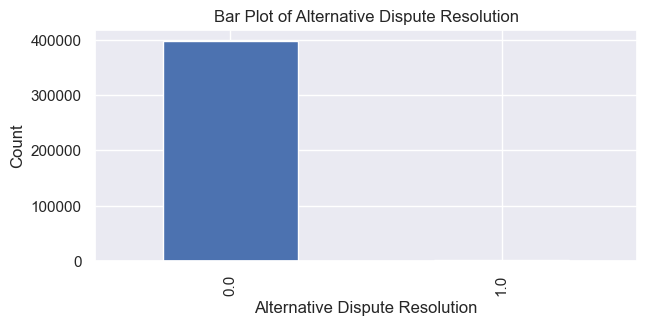

Attorney/Representative
float64


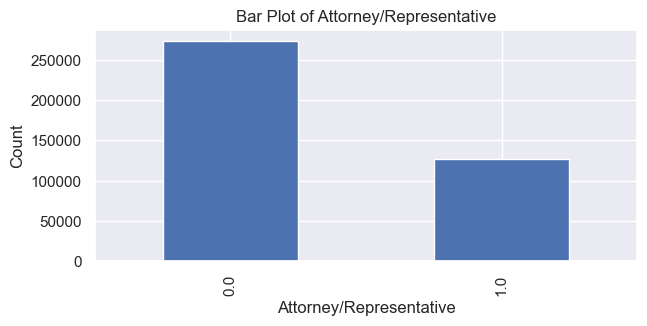

COVID-19 Indicator
float64


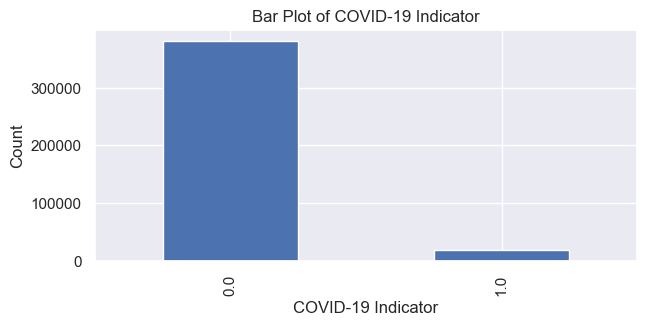

County of Injury
object


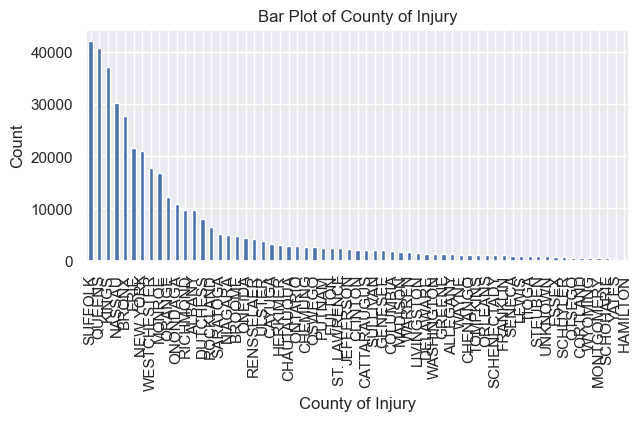

Carrier Type
object


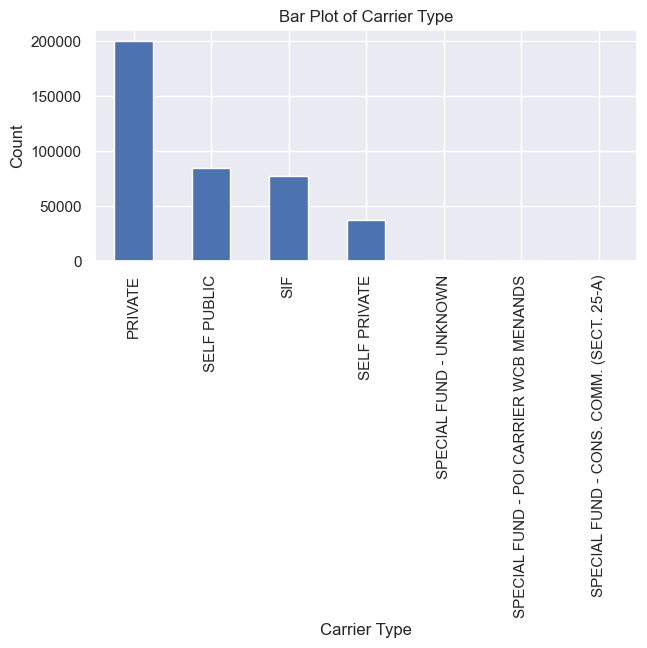

District Name
object


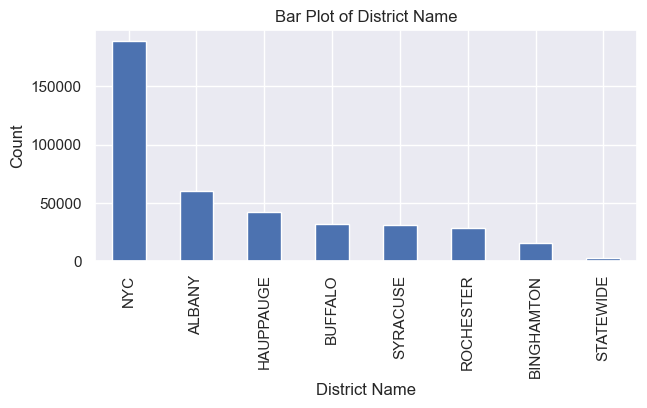

Gender
object


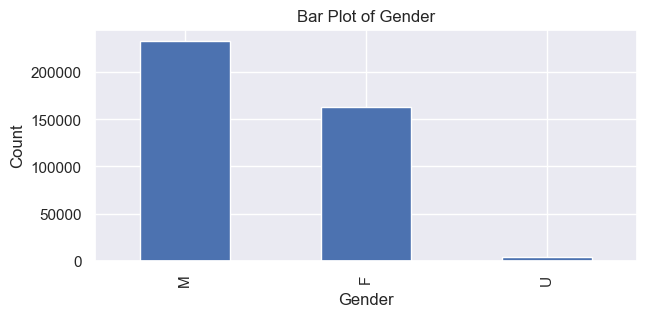

Medical Fee Region
object


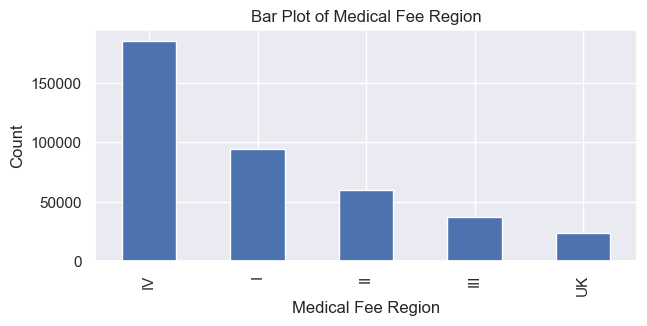

In [ ]:
for feature in features_categorical:
    print(feature)
    print(X_train_processed[feature].dtype)
    X_train_processed[feature].value_counts().plot(kind='bar', figsize=(7, 3))
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

# 6. Feature Engineering <a class="anchor" id="chapter6"></a>

Feature engineering is the process of preparing data for machine learning models by transforming raw data into meaningful features that enhance model performance. In this section, we create, select and modify variables to capture significant patterns within the data, making it more informative and useful for the model’s learning process. Through these transformations, we aim to improve the model’s accuracy and effectiveness.

## 6.1. Carrier-District Interaction <a class="anchor" id="section_6_1"></a>
Combining Carrier Type with District Name may reveal regional preferences for certain insurance carriers, which could be useful in understanding regional biases or regulations.

In [ ]:
# Creating a new feature by combining Carrier Type and District Name
#  It combines the values in the columns Carrier Type and District Name, joining them with an underscore (_) in between.
X_train_processed['Carrier_District_Interaction'] = X_train_processed['Carrier Type'] + "_" + X_train_processed['District Name']

# Apply to the val set
X_val_processed['Carrier_District_Interaction'] = X_val_processed['Carrier Type'] + "_" + X_val_processed['District Name']

# Apply to the test set
df_test_processed['Carrier_District_Interaction'] = df_test_processed['Carrier Type'] + "_" + df_test_processed['District Name']

## 6.2. Income Category  <a class="anchor" id="section_6_2"></a>

Creating categories for Average Weekly Wage can simplify the continuous nature of income into meaningful segments such as Low, Average, and High, which could help the model understand different socioeconomic statuses.

In [ ]:
# Calculate key percentiles
percentiles = X_train_processed['Average Weekly Wage'].quantile([0.25, 0.5, 0.75, 0.9])
print(percentiles)

0.25     877.575000
0.50    1155.929298
0.75    1271.734712
0.90    1667.776666
Name: Average Weekly Wage, dtype: float64


After analyzing the quantiles, we determined that dividing them into four categories was more appropriate, as having too many values in a category would not facilitate effective classification.

In [ ]:
# Defining the bins and labels for categorizing income based on percentiles
income_bins = [-float('inf'), 877.58, 1155.93, 1271.73, float('inf')]  # -float('inf') and float('inf') represent negative and positive infinity, respectively, allowing us to set open-ended ranges.
income_labels = ['Low Income', 'Lower-Middle Income', 'Upper-Middle Income', 'High Income']

# Creating the new feature for income categories for train set
X_train_processed['Income_Category'] = pd.cut(X_train_processed['Average Weekly Wage'], bins=income_bins, labels=income_labels)

# Apply to the val set
X_val_processed['Income_Category'] = pd.cut(X_val_processed['Average Weekly Wage'], bins=income_bins, labels=income_labels)

# Apply to the test set
df_test_processed['Income_Category'] = pd.cut(df_test_processed['Average Weekly Wage'], bins=income_bins, labels=income_labels)

In [ ]:
# Since we have created the new feature, we can drop the 'Average Weekly Wage' column
X_train_processed = X_train_processed.drop(columns=['Average Weekly Wage'])

#Apply to the val set   
X_val_processed = X_val_processed.drop(columns=['Average Weekly Wage']) 

# Apply to the test set
df_test_processed = df_test_processed.drop(columns=['Average Weekly Wage'])

## 6.3. Has First Hearing Date  <a class="anchor" id="section_6_3"></a>

Since First Hearing Date has a significant amount of missing values, transforming it into a binary feature (1 if it exists, 0 if it doesn't) will allow the model to consider the presence or absence of this date as a factor.


In [ ]:
# Creating a binary feature indicating the presence of First Hearing Date
X_train_processed['Has_1st_Hearing_Date'] = X_train_processed['First Hearing Date'].notna().astype(int)

# Apply to the val set
X_val_processed['Has_1st_Hearing_Date'] = X_val_processed['First Hearing Date'].notna().astype(int)

# Apply to the test set
df_test_processed['Has_1st_Hearing_Date'] = df_test_processed['First Hearing Date'].notna().astype(int)

In [ ]:
X_train_processed['Has_1st_Hearing_Date'].value_counts()

Has_1st_Hearing_Date
0    295575
1    104436
Name: count, dtype: int64

In [ ]:
# Drop First Hearing Date from the train, val and test set
X_train_processed = X_train_processed.drop(columns=['First Hearing Date'])
X_val_processed = X_val_processed.drop(columns=['First Hearing Date'])
df_test_processed = df_test_processed.drop(columns=['First Hearing Date'])

## 6.4. Accident Quarter  <a class="anchor" id="section_6_4"></a>
Temporal data can often influence outcomes. Extracting the quarter of the accident (e.g., 1st, 2nd, etc.)

In [ ]:
# Extracting the quarter of the Accident Date
X_train_processed['Accident_Quarter'] = pd.to_datetime(X_train_processed['Accident Date'], errors='coerce').dt.quarter

# Apply to the val set
X_val_processed['Accident_Quarter'] = pd.to_datetime(X_val_processed['Accident Date'], errors='coerce').dt.quarter

# Apply to the test set
df_test_processed['Accident_Quarter'] = pd.to_datetime(df_test_processed['Accident Date'], errors='coerce').dt.quarter

In [ ]:
X_train_processed["Accident_Quarter"].value_counts()

Accident_Quarter
1    106262
3    102518
4     98932
2     92299
Name: count, dtype: int64

## 6.5. Accident Year <a class="anchor" id="section_6_5"></a>
The year of the accident can help the model understand seasonal or yearly effects, like accident patterns during different times of the year.

In [ ]:
# Extracting the year from the Accident Date
X_train_processed['Accident_Year'] = pd.to_datetime(X_train_processed['Accident Date'], errors='coerce').dt.year

#Apply to the val set
X_val_processed['Accident_Year'] = pd.to_datetime(X_val_processed['Accident Date'], errors='coerce').dt.year

# Apply to the test set
df_test_processed['Accident_Year'] = pd.to_datetime(df_test_processed['Accident Date'], errors='coerce').dt.year

## 6.6. Accident on Day and Weekend <a class="anchor" id="section_6_6"></a>

The day of the accident may be significant, as weekends can have different risk factors compared to weekdays.

In [ ]:
# Extracting the day of the week and creating a feature to indicate if the accident occurred on a weekend
X_train_processed['Accident Day'] = pd.to_datetime(X_train_processed['Accident Date'], errors='coerce').dt.dayofweek
X_train_processed['Accident on Weekend'] = X_train_processed['Accident Day'].apply(lambda x: 1 if x >= 5 else 0)

#Apply to the val set
X_val_processed['Accident Day'] = pd.to_datetime(X_val_processed['Accident Date'], errors='coerce').dt.dayofweek
X_val_processed['Accident on Weekend'] = X_val_processed['Accident Day'].apply(lambda x: 1 if x >= 5 else 0)

# Apply to the test set
df_test_processed['Accident Day'] = pd.to_datetime(df_test_processed['Accident Date'], errors='coerce').dt.dayofweek    
df_test_processed['Accident on Weekend'] = df_test_processed['Accident Day'].apply(lambda x: 1 if x >= 5 else 0)

In [ ]:
print(X_train_processed["Accident Day"].value_counts())
print(X_train_processed["Accident on Weekend"].value_counts())

Accident Day
1    69578
2    69296
0    67630
3    67535
4    62124
5    32683
6    31165
Name: count, dtype: int64
Accident on Weekend
0    336163
1     63848
Name: count, dtype: int64


## 6.7. Age Group <a class="anchor" id="section_6_7"></a>

Grouping ages can help simplify the model’s understanding of different age demographics (e.g., Youth, Adult, Senior). This could potentially improve model interpretability and performance.

In [ ]:
np.sort(X_train_processed['Age at Injury'].unique())

array([16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28.,
       29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41.,
       42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54.,
       55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67.,
       68., 69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80.])

In [ ]:
# Creating bins and labels for age groups
age_bins = [0, 25, 45, 65, float('inf')]
age_labels = ['Youth', 'Young Adult', 'Middle Age', 'Senior']

# Creating a new feature for age groups
X_train_processed['Age Group'] = pd.cut(X_train_processed['Age at Injury'], bins=age_bins, labels=age_labels)

# Apply to the val set
X_val_processed['Age Group'] = pd.cut(X_val_processed['Age at Injury'], bins=age_bins, labels=age_labels)

# Apply to the test set
df_test_processed['Age Group'] = pd.cut(df_test_processed['Age at Injury'], bins=age_bins, labels=age_labels)

In [ ]:
# Drop 'Age at Injury' from the train, val and test set
X_train_processed = X_train_processed.drop(columns=['Age at Injury'])
X_val_processed = X_val_processed.drop(columns=['Age at Injury'])
df_test_processed = df_test_processed.drop(columns=['Age at Injury'])

## 6.8. Promptness_category <a class="anchor" id="section_6_8"></a>

The "promptness_category" feature categorizes the time taken between key events in the claims process, specifically measuring the difference between the Accident Date and the Assembly Date. This feature quantifies the speed or delay in assembling the claim and provides insight into how promptly claims are processed.

In [ ]:
def categorize_promptness(df, date1_col, date2_col, new_col_name):
    """
    Calculate and categorize promptness between two date columns.

    Parameters:
    - df: The DataFrame to process.
    - date1_col: The column representing the first date (e.g., Assembly Date).
    - date2_col: The column representing the second date (e.g., Accident Date).
    - new_col_name: The name of the new categorical column for promptness.

    Returns:
    - Updated DataFrame with new categorized promptness column.
    """
    # Calculate promptness in days and categorize it
    df[new_col_name] = pd.cut(
        (df[date1_col] - df[date2_col]).dt.days,
        bins=[0, 7, 14, 30, 90, 180, 365, float('inf')],
        labels=['Until 1 weeks','Between 1 and 2 weeks', 'Between 2 weeks and 1 month', '1 to 3 months', '3 to 6 months', '6 months to 1 year', 'More than 1 year'],
        right=True
    )
    return df

# Apply the function to X_train_processed
X_train_processed = categorize_promptness(X_train_processed, 'Assembly Date', 'Accident Date', 'promptness_category')

# Apply the function to X_val_processed
X_val_processed = categorize_promptness(X_val_processed, 'Assembly Date', 'Accident Date', 'promptness_category')

# Apply the function to df_test_processed
df_test_processed = categorize_promptness(df_test_processed, 'Assembly Date', 'Accident Date', 'promptness_category')

In [ ]:
X_train_processed['promptness_category'].value_counts()

promptness_category
Until 1 weeks                  159035
Between 1 and 2 weeks           85278
Between 2 weeks and 1 month     67546
1 to 3 months                   49761
3 to 6 months                   15460
More than 1 year                10797
6 months to 1 year               9429
Name: count, dtype: int64

## 6.9. promptness_C2_category <a class="anchor" id="section_6_9"></a>
The "promptness_C2_category" feature tracks the time taken to register the C-2 Date (the receipt of the employer's report of work-related injury/illness) after the Accident Date. It evaluates employers' promptness in reporting accidents, offering insights into compliance and potential administrative delays.

# this is ggiving negative values and id understand whhy

In [ ]:
# # Calculate the time from Accident Date to C-2 Date (in days)
# X_train_processed['Time_Accident_to_C2'] = (X_train_processed['C-2 Date'] - X_train_processed['Accident Date']).dt.days

# #Apply to the val set
# X_val_processed['Time_Accident_to_C2'] = (X_val_processed['C-2 Date'] - X_val_processed['Accident Date']).dt.days

# # Apply to the test set
# df_test_processed['Time_Accident_to_C2'] = (df_test_processed['C-2 Date'] - df_test_processed['Accident Date']).dt.days

In [ ]:
# Count the number of rows where C-2 Date is earlier than Accident Date
num_negative_values = (X_train_processed['C-2 Date'] < X_train_processed['Accident Date']).sum()

# Print the number of rows with negative values
print(f"Number of rows where C-2 Date is earlier than Accident Date: {num_negative_values}")

Number of rows where C-2 Date is earlier than Accident Date: 3803


In [ ]:
# Calculate promptness in days for C-2 Date
X_train_processed['Time_Accident_to_C2'] = (X_train_processed['C-2 Date'] - X_train_processed['Accident Date']).dt.days

# Replace negative values with Nan
np.sort(X_train_processed['Time_Accident_to_C2'].unique())

array([-4514, -3279,  -591, ..., 20529, 21439, 21503], dtype=int64)

In [ ]:
# # Calculate and categorize promptness for C-2 Date for X_train_processed
# X_train_processed['promptness_C2_category'] = pd.cut(
#     (X_train_processed['C-2 Date'] - X_train_processed['Accident Date']).dt.days,
#     bins=[0, 30, 90, 180, 365, float('inf')],
#     labels=['Until 1 month', '1 to 3 months', '3 to 6 months', '6 months to 1 year', 'More than 1 year'],
#     right=True
# )

# # Apply the same logic to X_val_processed
# X_val_processed['promptness_C2_category'] = pd.cut(
#     (X_val_processed['C-2 Date'] - X_val_processed['Accident Date']).dt.days,
#     bins=[0, 30, 90, 180, 365, float('inf')],
#     labels=['Until 1 month', '1 to 3 months', '3 to 6 months', '6 months to 1 year', 'More than 1 year'],
#     right=True
# )

# # Apply the same logic to df_test
# df_test_processed['promptness_C2_category'] = pd.cut(
#     (df_test_processed['C-2 Date'] - df_test_processed['Accident Date']).dt.days,
#     bins=[0, 30, 90, 180, 365, float('inf')],
#     labels=['Until 1 month', '1 to 3 months', '3 to 6 months', '6 months to 1 year', 'More than 1 year'],
#     right=True
# )


After creating new features based on the existing date columns, we will remove the original date features to avoid redundancy and simplify the dataset. We believe that the impact of these date features is adequately captured in the newly engineered features.

In [ ]:
X_train_processed = X_train_processed.drop(columns=['Accident Date', 'Assembly Date', 'C-2 Date'])

#Apply to the val set
X_val_processed = X_val_processed.drop(columns=['Accident Date','Assembly Date', 'C-2 Date'])

# Apply to the test set
df_test_processed = df_test_processed.drop(columns=['Accident Date', 'Assembly Date', 'C-2 Date'])

## 6.10. ZIP Code Region <a class="anchor" id="section_6_10"></a>

The first two digits of the ZIP Code typically represent a broader region, which could provide some geographic insights without the granularity of the full ZIP Code. This simplification can make the model more interpretable and help reduce the feature dimensionality.

In [ ]:
# Extracting the first two digits of the ZIP Code to create a region-based feature
X_train_processed['Zip Code Region'] = X_train_processed['Zip Code'].astype(str).str[:2]

# Apply to the val set
X_val_processed['Zip Code Region'] = X_val_processed['Zip Code'].astype(str).str[:2]

# Apply to the test set
df_test_processed['Zip Code Region'] = df_test_processed['Zip Code'].astype(str).str[:2]

In [ ]:
X_train_processed['Zip Code'].nunique()

6969

In [ ]:
X_train_processed['Zip Code Region'].nunique()

100

For this motive we will delete also the Zip Code, for now.

In [ ]:
X_train_processed = X_train_processed.drop(columns=['Zip Code'])
#Apply to the val set
# X_val_processed = X_val_processed.drop(columns=['Zip Code'])

# Apply to the test set
df_test_processed = df_test_processed.drop(columns=['Zip Code'])

## 6.11. Is UK Medical Fee Region <a class="anchor" id="section_6_11"></a>


The Medical Fee Region has a value of "UK," indicating that it is outside the typical US regions (such as I, II, etc.). To help the model distinguish between local and foreign medical fee regions, we can create a binary feature that flags whether the region is the UK or not.

In [ ]:
# Creating a binary feature indicating if Medical Fee Region is 'UK'
X_train_processed['Is_UK'] = X_train_processed['Medical Fee Region'].apply(lambda x: 1 if x == 'UK' else 0)

#Apply to the val set
X_val_processed['Is_UK'] = X_val_processed['Medical Fee Region'].apply(lambda x: 1 if x == 'UK' else 0)

# Apply to the test set
df_test_processed['Is_UK'] = df_test_processed['Medical Fee Region'].apply(lambda x: 1 if x == 'UK' else 0)

In [ ]:
X_train_processed["Medical Fee Region"].value_counts()

Medical Fee Region
IV     185349
I       94393
II      59550
III     37284
UK      23435
Name: count, dtype: int64

## 6.12. Carrier Type Merged <a class="anchor" id="section_6_12"></a>

Since there are several categories under "Special Fund" with very few occurrences, combining them into a single category can reduce noise in the data and make the feature more manageable for the model.

In [ ]:
# Creating a new feature that merges all 'Special Fund' categories into a single category for train, validation, and test sets
for dataset in [X_train_processed, X_val_processed, df_test_processed]:
    dataset['Carrier Type Merged'] = dataset['Carrier Type'].replace({
        'SPECIAL FUND - UNKNOWN': 'SPECIAL FUND',
        'SPECIAL FUND - POI CARRIER WCB MENANDS': 'SPECIAL FUND',
        'SPECIAL FUND - CONS. COMM. (SECT. 25-A)': 'SPECIAL FUND'
    })

# Verifying the updated column for X_train_processed
print(X_train_processed['Carrier Type Merged'].value_counts())

Carrier Type Merged
PRIVATE         199994
SELF PUBLIC      84896
SIF              77550
SELF PRIVATE     36845
SPECIAL FUND       726
Name: count, dtype: int64


For now we will also delete the Carrier Type

In [ ]:
X_train_processed = X_train_processed.drop(columns=['Carrier Type'])

#Apply to the val set
X_val_processed = X_val_processed.drop(columns=['Carrier Type'])

# Apply to the test set
df_test_processed = df_test_processed.drop(columns=['Carrier Type'])

## 6.13. Carrier_Name_Simplified <a class="anchor" id="section_6_13"></a>

The 'Carrier Name' feature has a high cardinality, which means there are many unique values—1951 in total. Having too many unique categories can cause problems in machine learning models, especially if some categories have very few instances. To simplify the analysis and improve the model performance, we will group carrier names with fewer than 3000 occurrences under a single category called 'OTHER'.


In [ ]:
# Print the most frequent Carrier Names along with their counts
most_frequent_carriers = X_train_processed['Carrier Name'].value_counts().head(30)  # Adjust the number if you need more
print("Most frequent Carrier Names with their counts:")
print(most_frequent_carriers)

Most frequent Carrier Names with their counts:
Carrier Name
STATE INSURANCE FUND             77550
POLICE, FIRE, SANITATION         15111
AMERICAN ZURICH INSURANCE CO     12277
CHARTER OAK FIRE INS CO          11960
INDEMNITY INS. OF N AMERICA       9954
SAFETY NATIONAL CASUALTY CORP     9621
NEW HAMPSHIRE INSURANCE CO        8877
LM INSURANCE CORP                 8519
A I U INSURANCE COMPANY           7656
INDEMNITY INSURANCE CO OF         6275
NYC TRANSIT AUTHORITY             5692
HARTFORD ACCIDENT & INDEMNITY     5233
NEW YORK BLACK CAR OPERATORS'     5146
ARCH INDEMNITY INSURANCE CO.      4652
AIU INSURANCE CO                  4496
CNY OTHER THAN ED, HED WATER      4312
HEALTH & HOSPITAL CORP.           3868
ARCH INDEMNITY INSURANCE CO       3784
PENNSYLVANIA MANUFACTURERS'       3421
ACE AMERICAN INSURANCE CO.        3206
PUBLIC EMPLOYERS RISK MGMT.       3201
OLD REPUBLIC INSURANCE CO.        3034
MEMIC INDEMNITY COMPANY           2904
WAL-MART ASSOCIATES, INC.         2757
COUN

In [ ]:
# Create a new feature called 'Carrier_Name_Simplified' based on 'Carrier Name' for train, validation, and test sets
X_train_processed['Carrier_Name_Simplified'] = X_train_processed['Carrier Name']
X_val_processed['Carrier_Name_Simplified'] = X_val_processed['Carrier Name']
df_test_processed['Carrier_Name_Simplified'] = df_test_processed['Carrier Name']

# Identify carrier names that occur fewer than 2000 times in X_train_processed
carrier_counts = X_train_processed['Carrier Name'].value_counts()
carriers_to_replace = carrier_counts[carrier_counts < 2000].index

# Replace carrier names with fewer than 2000 occurrences with 'OTHER' in all datasets using the identified carriers from X_train
for dataset in [X_train_processed, X_val_processed, df_test_processed]:
    dataset['Carrier_Name_Simplified'] = dataset['Carrier_Name_Simplified'].replace(carriers_to_replace, 'OTHER')

# Print the counts of the simplified carrier names in X_train_processed to verify the result
print("Counts of 'Carrier_Name_Simplified' feature in X_train_processed:")
print(X_train_processed['Carrier_Name_Simplified'].value_counts())


Counts of 'Carrier_Name_Simplified' feature in X_train_processed:
Carrier_Name_Simplified
OTHER                             153554
STATE INSURANCE FUND               77550
POLICE, FIRE, SANITATION           15111
AMERICAN ZURICH INSURANCE CO       12277
CHARTER OAK FIRE INS CO            11960
INDEMNITY INS. OF N AMERICA         9954
SAFETY NATIONAL CASUALTY CORP       9621
NEW HAMPSHIRE INSURANCE CO          8877
LM INSURANCE CORP                   8519
A I U INSURANCE COMPANY             7656
INDEMNITY INSURANCE CO OF           6275
NYC TRANSIT AUTHORITY               5692
HARTFORD ACCIDENT & INDEMNITY       5233
NEW YORK BLACK CAR OPERATORS'       5146
ARCH INDEMNITY INSURANCE CO.        4652
AIU INSURANCE CO                    4496
CNY OTHER THAN ED, HED WATER        4312
HEALTH & HOSPITAL CORP.             3868
ARCH INDEMNITY INSURANCE CO         3784
PENNSYLVANIA MANUFACTURERS'         3421
ACE AMERICAN INSURANCE CO.          3206
PUBLIC EMPLOYERS RISK MGMT.         3201
OLD REPU

In [ ]:
#print the number of unique values in the original 'Carrier Name' feature
print(f"Number of unique values in 'Carrier Name ':{X_train_processed['Carrier Name'].nunique()}")

#print the number of unique values in the simplified 'Carrier_Name_Simplified' feature
print(f"Number of unique values in 'Carrier_Name_Simplified ':{X_train_processed['Carrier_Name_Simplified'].nunique()}")

Number of unique values in 'Carrier Name ':1959
Number of unique values in 'Carrier_Name_Simplified ':35


In [ ]:
X_train_processed = X_train_processed.drop(columns=['Carrier Name'])

#Apply to the val set
X_val_processed = X_val_processed.drop(columns=['Carrier Name'])

# Apply to the test set
df_test_processed = df_test_processed.drop(columns=['Carrier Name'])

## 6.14. Body_Part_Category <a class="anchor" id="section_6_14"></a>
The Body_Part_Category feature will group the WCIO_Part_of_Body_Code into broader categories. Based on the codes in your document, each range of codes represents a specific body part region (e.g., codes from 10 to 19 represent the head). We’ll map these codes to corresponding regions like “Head,” “Neck,” etc.

In [ ]:
# Mapping of WCIO Part of Body codes to broader categories
part_of_body_mapping = {
    **dict.fromkeys(range(10, 20), 'Head'),
    **dict.fromkeys(range(20, 30), 'Neck'),
    **dict.fromkeys(range(30, 40), 'Upper Extremities'),
    **dict.fromkeys(range(40, 50), 'Trunk'),
    **dict.fromkeys(range(50, 60), 'Lower Extremities'),
    **dict.fromkeys([64, 65, 66, 90, 91, 99], 'Multiple Body Parts'),
    **dict.fromkeys([101], 'Multiple')

}

# Creating the Body_Part_Category column by mapping Part of Body codes to categories
X_train_processed['Body_Part_Category'] = X_train_processed['WCIO Part Of Body Code'].map(part_of_body_mapping)

#Apply to the val set
X_val_processed['Body_Part_Category'] = X_train_processed['WCIO Part Of Body Code'].map(part_of_body_mapping)

# Apply to the test set
df_test_processed['Body_Part_Category'] = df_test_processed['WCIO Part Of Body Code'].map(part_of_body_mapping)

## 6.15. Injury_Nature_Category <a class="anchor" id="section_6_15"></a>

The Injury_Nature_Category feature groups WCIO_Nature_of_Injury_Code into categories that describe the type of injury, such as "Specific Injury," "Occupational Disease or Cumulative Injury," and "Multiple Injuries." We’ll create a mapping based on the ranges provided in the document.

In [ ]:
# Mapping of WCIO Nature of Injury codes to broader categories
nature_of_injury_mapping = {
    **dict.fromkeys([1], 'No Physical Injury'),
    **dict.fromkeys(range(2, 59), 'Specific Injury'),
    **dict.fromkeys(range(60, 80), 'Occupational Disease or Cumulative Injury'),
    **dict.fromkeys([90, 91], 'Multiple Injuries')
}

# Creating the Injury_Nature_Category column by mapping Nature of Injury codes to categories
X_train_processed['Injury_Nature_Category'] = X_train_processed['WCIO Nature of Injury Code'].map(nature_of_injury_mapping)

#Apply to the val set
X_val_processed['Injury_Nature_Category'] = X_val_processed['WCIO Nature of Injury Code'].map(nature_of_injury_mapping)

# Apply to the test set
df_test_processed['Injury_Nature_Category'] = df_test_processed['WCIO Nature of Injury Code'].map(nature_of_injury_mapping)

## 6.16. Injury_Cause_Category <a class="anchor" id="section_6_16"></a>
The Injury_Cause_Category feature will classify the WCIO_Cause_of_Injury_Code values into broader cause categories. For example, codes related to burns or scalds can be grouped together, as well as those for falls or motor vehicle accidents.

In [ ]:
# Mapping of WCIO Cause of Injury codes to broader categories
cause_of_injury_mapping = {
    **dict.fromkeys(range(1, 10), 'Burn or Scald'),
    **dict.fromkeys(range(10, 20), 'Caught In, Under, or Between'),
    **dict.fromkeys(range(15, 20), 'Cut, Puncture, Scrape'),
    **dict.fromkeys(range(25, 35), 'Fall, Slip, or Trip'),
    **dict.fromkeys(range(40, 50), 'Motor Vehicle'),
    **dict.fromkeys(range(50, 70), 'Strain or Injury By'),
    **dict.fromkeys(range(70, 90), 'Striking Against or Stepping On'),
    **dict.fromkeys(range(90, 100), 'Miscellaneous Causes')
}

# Creating the Injury_Cause_Category column by mapping Cause of Injury codes to categories
X_train_processed['Injury_Cause_Category'] = X_train_processed['WCIO Cause of Injury Code'].map(cause_of_injury_mapping)

#Apply to the val set   
X_val_processed['Injury_Cause_Category'] = X_val_processed['WCIO Cause of Injury Code'].map(cause_of_injury_mapping)

# Apply to the test set
df_test_processed['Injury_Cause_Category'] = df_test_processed['WCIO Cause of Injury Code'].map(cause_of_injury_mapping)


Since we have created new categorical features (Injury_Nature_Category, Body_Part_Category, Injury_Cause_Category) that provide a more meaningful representation of the original codes, it makes sense to remove the original code features. Keeping them would add redundancy, decrease interpretability, and unnecessarily increase the dimensionality of the dataset, potentially affecting model performance.

In [ ]:
# Removing the code features from train, validation, and test datasets
X_train_processed = X_train_processed.drop(columns=[
    'WCIO Cause of Injury Code',
    'WCIO Nature of Injury Code',
    'WCIO Part Of Body Code'
])

X_val_processed = X_val_processed.drop(columns=[
    'WCIO Cause of Injury Code',
    'WCIO Nature of Injury Code',
    'WCIO Part Of Body Code'
])

df_test_processed = df_test_processed.drop(columns=[
    'WCIO Cause of Injury Code',
    'WCIO Nature of Injury Code',
    'WCIO Part Of Body Code'
])


# 7. Feature Selection <a class="anchor" id="chapter7"></a>

In [ ]:
X_train_processed.describe(include='O').T

,count,unique,top,freq
County of Injury,400011,63,SUFFOLK,42146
District Name,400011,8,NYC,188585
Gender,400011,3,M,233561
Medical Fee Region,400011,5,IV,185349
Carrier_District_Interaction,400011,45,PRIVATE_NYC,92442
Zip Code Region,400011,100,11,143730
Carrier Type Merged,400011,5,PRIVATE,199994
Carrier_Name_Simplified,400011,35,OTHER,153554
Body_Part_Category,383339,7,Upper Extremities,124298
Injury_Nature_Category,355129,4,Specific Injury,334448


In [ ]:
X_train_processed['Income_Category']

Claim Identifier
6097039    Lower-Middle Income
5398719             Low Income
6131592    Lower-Middle Income
5840948    Lower-Middle Income
5755373            High Income
                  ...         
5472006    Upper-Middle Income
5935131             Low Income
6074985    Lower-Middle Income
5402915             Low Income
6128049            High Income
Name: Income_Category, Length: 400011, dtype: category
Categories (4, object): ['Low Income' < 'Lower-Middle Income' < 'Upper-Middle Income' < 'High Income']

In [ ]:
X_train_processed.describe().T

,count,mean,std,min,25%,50%,75%,max
Alternative Dispute Resolution,400011.0,0.004700,0.068394,0.0,0.0,0.0,0.0,1.0
Attorney/Representative,400011.0,0.315674,0.464784,0.0,0.0,0.0,1.0,1.0
COVID-19 Indicator,400011.0,0.048016,0.213801,0.0,0.0,0.0,0.0,1.0
IME-4 Count,400011.0,0.741707,1.923091,0.0,0.0,0.0,0.0,73.0
Industry Code,400011.0,58.580119,19.705001,11.0,45.0,61.0,71.0,92.0
WCIO Cause of Injury Code,400011.0,54.350683,25.480048,1.0,31.0,56.0,75.0,99.0
WCIO Nature of Injury Code,400011.0,41.244981,21.941034,1.0,25.0,49.0,52.0,91.0
WCIO Part Of Body Code,400011.0,47.837749,22.779843,10.0,35.0,42.0,55.0,101.0
Number of Dependents,400011.0,3.003342,2.002660,0.0,1.0,3.0,5.0,6.0
Accident Year,400011.0,2020.832047,1.818478,1961.0,2020.0,2021.0,2022.0,2022.0


In [ ]:
df.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Injury Type', 'County of Injury', 'COVID-19 Indicator',
       'District Name', 'First Hearing Date', 'Gender', 'IME-4 Count',
       'Industry Code', 'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code',
       'Agreement Reached', 'Number of Dependents', 'Accident Year'],
      dtype='object')

In [ ]:
X_train_processed.columns

Index(['Accident Date', 'Alternative Dispute Resolution', 'Assembly Date',
       'Attorney/Representative', 'C-2 Date', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'Gender', 'IME-4 Count',
       'Industry Code', 'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code',
       'Number of Dependents', 'Accident Year', 'Carrier_District_Interaction',
       'Income_Category', 'Has_1st_Hearing_Date', 'Accident_Quarter',
       'Accident_Year', 'Accident Day', 'Accident on Weekend', 'Age Group',
       'promptness_category', 'Zip Code Region', 'Is_UK',
       'Carrier Type Merged', 'Carrier_Name_Simplified', 'Body_Part_Category',
       'Injury_Nature_Category', 'Injury_Cause_Category'],
      dtype='object')

In [ ]:
# Define the feature categories
categorical_columns = [
    'Carrier_Name_Simplified','County of Injury', 
    'District Name', 'Gender', 'Medical Fee Region', 
    'Carrier_District_Interaction',
    'Zip Code Region', 'Carrier Type Merged','Income_Category','Age Group', 'Industry Code', 
    #'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 
    #'WCIO Part Of Body Code',
    # 'Carrier Type', 
    'Body_Part_Category', 'Injury_Nature_Category', 'Injury_Cause_Category','promptness_category'
]

binary_columns = [
    'Attorney/Representative', 'COVID-19 Indicator',
    'Has_1st_Hearing_Date', 'Accident on Weekend', 'Is_UK','Alternative Dispute Resolution'
]

discrete_columns = [ 'Number of Dependents', 'IME-4 Count',
    'Accident_Quarter', 'Accident_Year', 'Accident Day'
]

# Printing the feature categories
print("Categorical Features:", categorical_columns)
print("Binary Features:", binary_columns)
print("Discrete Features:", discrete_columns)

Categorical Features: ['Carrier_Name_Simplified', 'County of Injury', 'District Name', 'Gender', 'Medical Fee Region', 'Carrier_District_Interaction', 'Zip Code Region', 'Carrier Type Merged', 'Income_Category', 'Age Group', 'Industry Code', 'Body_Part_Category', 'Injury_Nature_Category', 'Injury_Cause_Category', 'promptness_category']
Binary Features: ['Attorney/Representative', 'COVID-19 Indicator', 'Has_1st_Hearing_Date', 'Accident on Weekend', 'Is_UK', 'Alternative Dispute Resolution']
Discrete Features: ['Number of Dependents', 'IME-4 Count', 'Accident_Quarter', 'Accident_Year', 'Accident Day']


## 7.1. Preparing Data</b> <a class="anchor" id="section_7_1"></a>


In [ ]:
# Convert discrete columns to integer
for column in discrete_columns:
    X_train_processed[column] = X_train_processed[column].astype(int)
    X_val_processed[column] = X_val_processed[column].astype(int)
    df_test_processed[column] = df_test_processed[column].astype(int)

In [ ]:
#scaling features
# Usar robustscaler para dados que contêm outliers
# Usar minmaxscaler para dados que não têm outliers (conversa do chatgpt)
from sklearn.preprocessing import MinMaxScaler
feat_scaler = MinMaxScaler()
X_train_processed[discrete_columns] = feat_scaler.fit_transform(X_train_processed[discrete_columns])

X_train_num_scaled = X_train_processed[discrete_columns]

#apply same transformation for val data
X_val_processed[discrete_columns] = feat_scaler.transform(X_val_processed[discrete_columns])

X_val_num_scaled = X_val_processed[discrete_columns]

#apply same transformation for test data
df_test_processed[discrete_columns] = feat_scaler.transform(df_test_processed[discrete_columns])
df_test_num_scaled = df_test_processed[discrete_columns]

#X_val, X_train
X_train_num_scaled

,Number of Dependents,IME-4 Count,Accident_Quarter,Accident_Year,Accident Day
Claim Identifier,,,,,
6097039,0.000000,0.000000,0.666667,1.000000,0.333333
5398719,0.666667,0.000000,1.000000,0.950820,1.000000
6131592,0.000000,0.000000,1.000000,1.000000,0.000000
5840948,1.000000,0.000000,0.666667,0.983607,0.333333
5755373,0.666667,0.027397,0.333333,0.983607,0.000000
...,...,...,...,...,...
5472006,0.500000,0.000000,0.000000,0.967213,0.666667
5935131,0.833333,0.000000,0.000000,1.000000,0.666667
6074985,0.333333,0.013699,0.666667,1.000000,0.166667


In [ ]:
X_train_num_scaled.var()

Number of Dependents    0.111407
IME-4 Count             0.000694
Accident_Quarter        0.141748
Accident_Year           0.000890
Accident Day            0.092986
dtype: float64

 ## 7.2. Numerical Features</b> <a class="anchor" id="section_7_2"></a>

 > ### Spearman correlation matrix <a class="anchor" id="sub_section_4_1_2"></a>

In [ ]:
def cor_heatmap(cor, name):
    plt.figure(figsize=(18,12))
    sns.heatmap(data = cor.round(2), annot = True, cmap = 'viridis', linecolor = 'white', linewidth=0.5, fmt='.2', mask=np.triu(cor, k=0))
    plt.title(f'{name} Correlation Matrix', fontdict = {'fontsize': 20})
    plt.show()

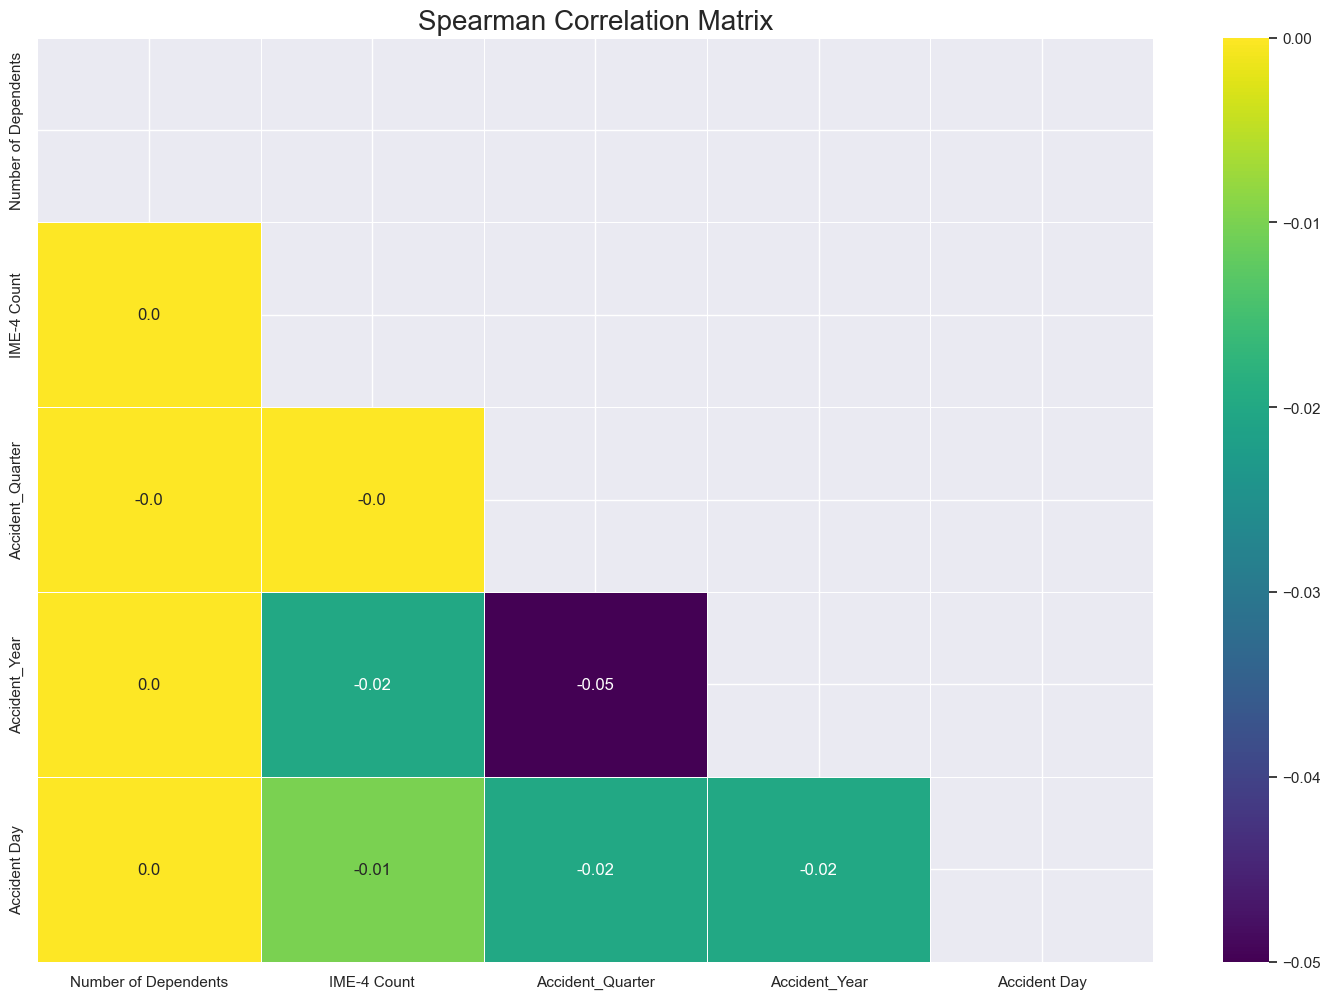

In [ ]:
corr_data_numerical = X_train_num_scaled 
cor_spearman = corr_data_numerical.corr(method='spearman')

cor_heatmap(cor_spearman, 'Spearman')

 > ### LASSO Regression <a class="anchor" id="sub_section_4_1_3"></a>

In [ ]:
#fit regression
reg = LassoCV().fit(X_train_num_scaled, y_train)
#get coefficients
coef = pd.Series(reg.coef_, index = X_train_num_scaled.columns)
#obtain coef values
coef.sort_values()

Accident_Year           -1.603714
Accident Day            -0.048078
Number of Dependents     0.004459
Accident_Quarter         0.019509
IME-4 Count             28.630549
dtype: float64

In [ ]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(3,5))
    imp_coef.plot(kind = "barh", color='c')
    plt.title("Feature importance using " + name + " Model")
    plt.show()

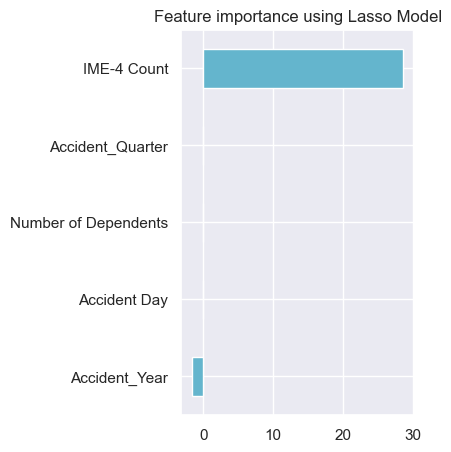

In [ ]:
plot_importance(coef,'Lasso')

 > ### Recursive Feature Elimination - RFE <a class="anchor" id="sub_section_4_1_4"></a>

In [ ]:
X_train_num_scaled.columns

Index(['Number of Dependents', 'IME-4 Count', 'Accident_Quarter',
       'Accident_Year', 'Accident Day'],
      dtype='object')

In [ ]:
# Number of features
nof_list=np.arange(1,5)            
high_score=0
# Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LogisticRegression()
    rfe = RFE(model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_num_scaled,y_train)
    X_val_rfe = rfe.transform(X_val_num_scaled)
    model.fit(X_train_rfe,y_train)
    
    score = model.score(X_val_rfe,y_val)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 2
Score with 2 features: 0.624380


In [ ]:
#rfscv- to select 1st the number of features we should select
model = LogisticRegression()
rfe = RFE(estimator = model, n_features_to_select = 2)

In [ ]:
X_rfe= rfe.fit_transform(X=X_train_num_scaled, y=y_train)

In [ ]:
selected_features = pd.Series(rfe.support_, index = X_train_num_scaled.columns)
selected_features

Number of Dependents    False
IME-4 Count              True
Accident_Quarter        False
Accident_Year            True
Accident Day            False
dtype: bool

# rfe com SVM - esteve a correr pelo menos 9h, depois posso deixar correr um dia inteiro

In [ ]:
# #no of features
# nof_list=np.arange(1,12)            
# high_score=0
# #Variable to store the optimum features
# nof=0           
# train_score_list =[]
# val_score_list = []

# for n in range(len(nof_list)):
#     #call support vector machines classifier
#     model = SVC(kernel = 'linear')
    
#     #create RFE instance
#     rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    
#     #fit and transform for training data, transform for val data
#     X_train_rfe = rfe.fit_transform(X_train_num_scaled,y_train)
#     X_val_rfe = rfe.transform(X_val_num_scaled)
    
#     model.fit(X_train_rfe,y_train)
    
#     #storing results on training data
#     train_score = model.score(X_train_rfe,y_train)
#     train_score_list.append(train_score)
    
#     #storing results on training data
#     val_score = model.score(X_val_rfe,y_val)
#     val_score_list.append(val_score)
    
#     #check best score
#     if(val_score > high_score):
#         high_score = val_score
#         nof = nof_list[n]
        
#         #adding mention of variables to keep
#         features_to_select = pd.Series(rfe.support_, index = X_train_num_scaled.columns)
        
# print("Optimum number of features: %d" %nof)
# print("Score with %d features: %f" % (nof, high_score))
# print(f"Features to select: \n{features_to_select}")

## 7.3. Categorical Features</b> <a class="anchor" id="section_7_3"></a>
Chi-squared and MIC for the categorical ones.

 > ### $\chi ^2$ Test for Independence <a class="anchor" id="sub_section_4_2_1"></a>

In [ ]:
categorical_columns

['Carrier_Name_Simplified',
 'County of Injury',
 'District Name',
 'Gender',
 'Medical Fee Region',
 'Carrier_District_Interaction',
 'Zip Code Region',
 'Carrier Type Merged',
 'Income_Category',
 'Age Group',
 'Industry Code',
 'Body_Part_Category',
 'Injury_Nature_Category',
 'Injury_Cause_Category',
 'promptness_category']

In [ ]:
binary_columns

['Attorney/Representative',
 'COVID-19 Indicator',
 'Has_1st_Hearing_Date',
 'Accident on Weekend',
 'Is_UK',
 'Alternative Dispute Resolution']

In [ ]:
from sklearn.preprocessing import LabelEncoder

## for now lets use label encoder but that does not makes much more sense because we dont have an order... we need to use one hot encoder byt it will increase the dimensionality of the data

# Initialize a LabelEncoder
label_encoders = {}

# Apply LabelEncoder to each categorical column in training and then transform validation and test datasets
for col in categorical_columns:
    le = LabelEncoder()
    
    # Fit LabelEncoder on the training data
    X_train_processed[col] = le.fit_transform(X_train_processed[col])
    
    # Handle unseen labels in validation and test data
    # Add an "Unknown" label to classes to handle unseen labels
    le.classes_ = np.append(le.classes_, 'Unknown')

    # Replace unseen labels in validation and test data with 'Unknown'
    X_val_processed[col] = X_val_processed[col].apply(lambda x: x if x in le.classes_ else 'Unknown')
    df_test_processed[col] = df_test_processed[col].apply(lambda x: x if x in le.classes_ else 'Unknown')

    # Transform validation and test datasets using the fitted label encoder
    X_val_processed[col] = le.transform(X_val_processed[col])
    df_test_processed[col] = le.transform(df_test_processed[col])

    # Store the label encoder for future use if needed
    label_encoders[col] = le

In [ ]:
categorical_columns_with_binary = categorical_columns + binary_columns
len(categorical_columns_with_binary)

21

In [ ]:
categorical_columns_with_binary

['Carrier_Name_Simplified',
 'County of Injury',
 'District Name',
 'Gender',
 'Medical Fee Region',
 'Carrier_District_Interaction',
 'Zip Code Region',
 'Carrier Type Merged',
 'Income_Category',
 'Age Group',
 'Industry Code',
 'Body_Part_Category',
 'Injury_Nature_Category',
 'Injury_Cause_Category',
 'promptness_category',
 'Attorney/Representative',
 'COVID-19 Indicator',
 'Has_1st_Hearing_Date',
 'Accident on Weekend',
 'Is_UK',
 'Alternative Dispute Resolution']

In [ ]:
#Chi-square test
threshold = 14 #we want to only keep the 14 most relevant features
high_score_features_chi2 = []
scores = []
names_Chi2 = []

feature_scores = SelectKBest(chi2, k=threshold).fit(X_train_processed[categorical_columns_with_binary],y_train).scores_

high_score_features = []
for score, f_name in sorted(zip(feature_scores,X_train_processed[categorical_columns_with_binary].columns), reverse=True)[:threshold]:
        high_score_features_chi2.append(f_name)
        scores.append(score)
        names_Chi2.append(f_name)

In [ ]:
names_Chi2

['Attorney/Representative',
 'Has_1st_Hearing_Date',
 'Carrier_District_Interaction',
 'Income_Category',
 'Industry Code',
 'Carrier Type Merged',
 'Carrier_Name_Simplified',
 'promptness_category',
 'COVID-19 Indicator',
 'Age Group',
 'County of Injury',
 'Medical Fee Region',
 'Body_Part_Category',
 'Alternative Dispute Resolution']

> ### Mutual Information Criterion <a class="anchor" id="sub_section_4_2_2"></a>

In [ ]:
 #MIC 
threshold = 14 #we want to only keep the 14 most relevant features
high_score_features_MIC = []
scores = []
names_MIC = []
feature_scores = mutual_info_classif(X_train_processed[categorical_columns_with_binary],y_train, random_state=42)
for score, f_name in sorted(zip(feature_scores, X_train_processed[categorical_columns_with_binary].columns), reverse=True)[:threshold]:
        high_score_features_MIC.append(f_name)
        scores.append(score)
        names_MIC.append(f_name)

In [ ]:
names_MIC

['Attorney/Representative',
 'Has_1st_Hearing_Date',
 'Income_Category',
 'Body_Part_Category',
 'Carrier_Name_Simplified',
 'Injury_Cause_Category',
 'Industry Code',
 'Injury_Nature_Category',
 'Carrier_District_Interaction',
 'promptness_category',
 'Carrier Type Merged',
 'Age Group',
 'District Name',
 'Gender']

In [ ]:
common_categorical_features = list(set(names_Chi2).intersection(list(names_MIC)))
features_selected = common_categorical_features

In [ ]:
features_selected

['Carrier Type Merged',
 'Industry Code',
 'promptness_category',
 'Body_Part_Category',
 'Attorney/Representative',
 'Carrier_District_Interaction',
 'Income_Category',
 'Age Group',
 'Carrier_Name_Simplified',
 'Has_1st_Hearing_Date']

## 7.4. Final Features</b> <a class="anchor" id="section_7_4"></a>

Make that beautiful table, where we say in which case we reject each variable and then the final decision


| Predictor                | Spearman | Lasso  | RFE LR | RFE SVM | What to do? (One possible way to "solve")              |
|--------------------------|----------|--------|--------|---------|--------------------------------------------------------|
| Number of Dependents     | Keep     | Discard| Discard|         | Discard                                                |
| IME-4 Count              | Keep     | Keep   | Keep   |         | Include in the model                                   |
| Accident_Quarter         | Keep     | Discard| Discard|         | Discard                                                |
| Accident_Year            | Keep     | Keep   | Keep   |         | Include in the model                                   |
| Accident Day             | Keep     | Discard| Discard|         | Discard                                                |

| Predictor                   | X²       | MIC     | What to do? (One possible way to "solve")              |
|-----------------------------|----------|---------|--------------------------------------------------------|
| Carrier_Name_Simplified     | Keep     | Keep    | Include in the model                                   |
| County of Injury            | Keep     | Discard | Consider including if adds value                       |
| District Name               | Discard  | Keep    | Consider including if adds value                       |
| Gender                      | Discard  | Keep    | Consider including if adds value                       |
| Medical Fee Region          | Keep     | Keep    | Include in the model                                   |
| Carrier_District_Interaction| Keep     | Keep    | Include in the model                                   |
| Zip Code Region             | Discard  | Discard | Discard                                                |
| Carrier Type Merged         | Keep     | Keep    | Include in the model                                   |
| Income_Category             | Keep     | Keep    | Include in the model                                   |
| Age Group                   | Keep     | Keep    | Include in the model                                   |
| Attorney/Representative     | Keep     | Keep    | Include in the model                                   |
| COVID-19 Indicator          | Keep     | Discard | Consider including if adds value                       |
| Has_1st_Hearing_Date        | Keep     | Keep    | Include in the model                                   |
| Accident on Weekend         | Discard  | Discard | Discard                                                |
| Is_UK                       | Discard  | Discard | Discard                                                |
| Alternative Dispute Resolution | Keep  | Discard | Consider including if adds value                       |
| Body_Part_Category          | Keep     | Keep    | Include in the model                                   |
| Injury_Nature_Category      | Discard  | Keep    | Consider including if adds value                       |
| Injury_Cause_Category       | Discard  | Keep    | Consider including if adds value                       |
| Industry Code               | Keep     | Keep    | Include in the model                                   |


In [ ]:
# 1. `final_features_df` for final selected features
# 2. `potential_value_df` for features that are potentially valuable

# Defining the lists of features based on the provided decisions
final_features = [
    "Carrier_Name_Simplified",
    "Medical Fee Region",
    "Carrier_District_Interaction",
    "Carrier Type Merged",
    "Income_Category",
    "Age Group",
    "Attorney/Representative",
    "Has_1st_Hearing_Date",
    "Body_Part_Category",
    "Industry Code"
]

potential_value_features = [
    "County of Injury",
    "District Name",
    "Gender",
    "COVID-19 Indicator",
    "Alternative Dispute Resolution",
    "Injury_Nature_Category",
    "Injury_Cause_Category"
]

# Selecting final features
final_features_X_train = X_train_processed[final_features]
    
# Selecting features with potential value
potential_value_X_train = X_train_processed[final_features + potential_value_features]

# Same for validation
# Selecting final features
final_features_X_val = X_val_processed[final_features]
    
# Selecting features with potential value
potential_value_X_val = X_val_processed[final_features + potential_value_features]

#Same for test
# Selecting final features
final_features_df_test  = df_test_processed[final_features]
    
# Selecting features with potential value
potential_value_df_test = df_test_processed[final_features + potential_value_features]


# 8. Modeling <a class="anchor" id="chapter8"></a>


> ### Logistic  Regression

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Define a function to print metrics and plot a colorful confusion matrix
def metrics(y_train, pred_train, y_val, pred_val):
    # Print classification report for training data
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    train_cm = confusion_matrix(y_train, pred_train)
    print(train_cm)
    
    # Plot confusion matrix for training data
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.heatmap(train_cm, annot=True, cmap='Blues', fmt='d', cbar=False)
    plt.title('Training Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    
    # Print classification report for validation data
    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    val_cm = confusion_matrix(y_val, pred_val)
    print(val_cm)

    # Plot confusion matrix for validation data
    plt.subplot(1, 2, 2)
    sns.heatmap(val_cm, annot=True, cmap='Oranges', fmt='d', cbar=False)
    plt.title('Validation Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    
    # Show the plots
    plt.tight_layout()
    plt.show()



In [ ]:
# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Metrics for Logistic Regression
log_reg.fit(final_features_X_train, y_train)
pred_train_log_final = log_reg.predict(final_features_X_train)
pred_val_log_final = log_reg.predict(final_features_X_val)
metrics(y_train, pred_train_log_final, y_val, pred_val_log_final)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.13      0.00      0.01      8684
           1       0.00      0.00      0.00       319
           2       0.33      0.01      0.01     47902
           3       0.69      0.95      0.80    203272
           4       0.00      0.00      0.00      2931
           5       0.49      0.26      0.34     33246
           6       0.00      0.00      0.00        66
           7       0.55      0.53      0.54    103591

    accuracy                           0.64    400011
   macro avg       0.27      0.22      0.21    400011
weighted avg       0.57      0.64      0.58    400011

[[    31      0     11   

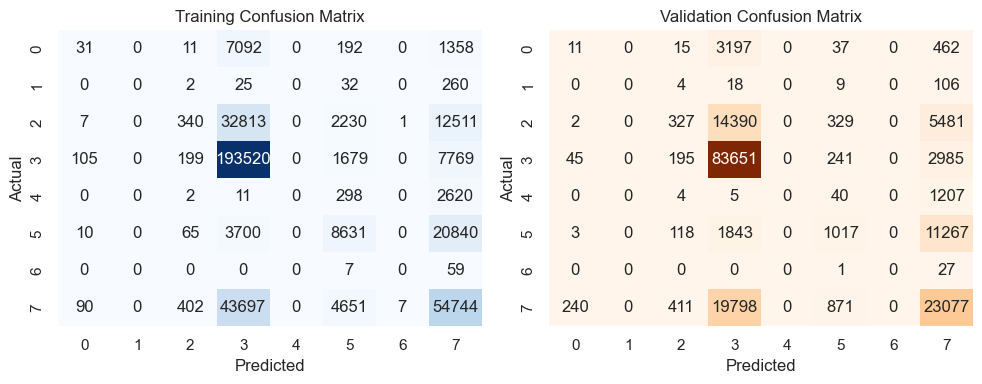

In [ ]:
# Fit model with final features and potential value features
log_reg.fit(potential_value_X_train, y_train)
y_pred_log_potential = log_reg.predict(potential_value_X_val)

log_reg.fit(potential_value_X_train, y_train)
pred_train_log_potential = log_reg.predict(potential_value_X_train)
pred_val_log_potential = log_reg.predict(potential_value_X_val)
metrics(y_train, pred_train_log_potential, y_val, pred_val_log_potential)

> ### Decision Trees 

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      8684
           1       0.90      0.95      0.92       319
           2       0.92      0.95      0.94     47902
           3       0.97      0.98      0.97    203272
           4       0.97      0.98      0.98      2931
           5       0.98      0.98      0.98     33246
           6       1.00      1.00      1.00        66
           7       0.99      0.94      0.96    103591

    accuracy                           0.96    400011
   macro avg       0.94      0.96      0.95    400011
weighted avg       0.97      0.96      0.96    400011

[[  7738      0     12   

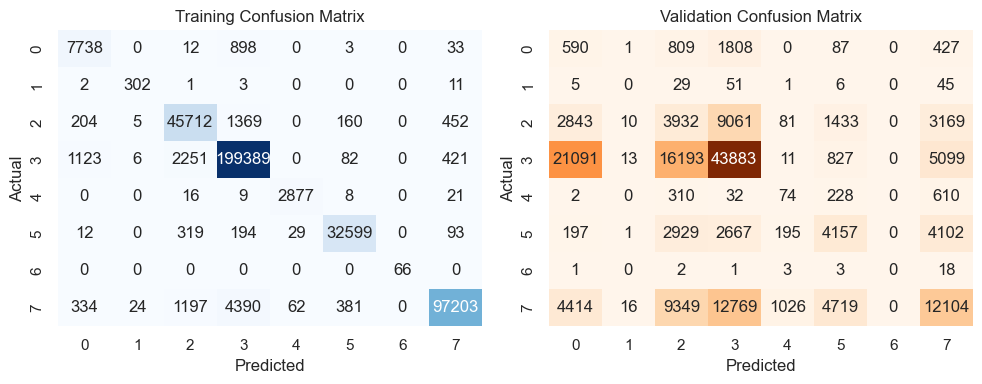

In [ ]:
# Decision Tree Model
dt = DecisionTreeClassifier(random_state=42)

# Fit model with final features
dt.fit(final_features_X_train, y_train)
y_pred_dt_final = dt.predict(final_features_X_val)

# Metrics for Decision Tree
dt.fit(final_features_X_train, y_train)
pred_train_dt_final = dt.predict(final_features_X_train)
pred_val_dt_final = dt.predict(final_features_X_val)
metrics(y_train, pred_train_dt_final, y_val, pred_val_dt_final)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8684
           1       1.00      1.00      1.00       319
           2       1.00      1.00      1.00     47902
           3       1.00      1.00      1.00    203272
           4       1.00      1.00      1.00      2931
           5       1.00      1.00      1.00     33246
           6       1.00      1.00      1.00        66
           7       1.00      1.00      1.00    103591

    accuracy                           1.00    400011
   macro avg       1.00      1.00      1.00    400011
weighted avg       1.00      1.00      1.00    400011

[[  8684      0      0   

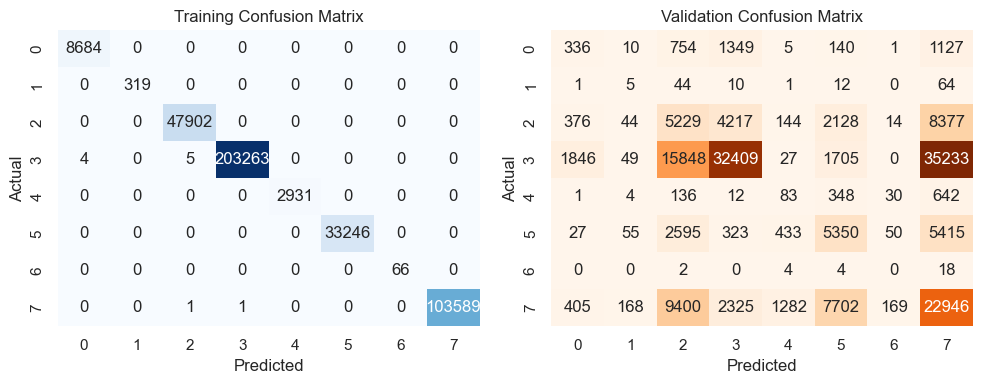

In [ ]:
# Fit model with final features and potential value features
dt.fit(potential_value_X_train, y_train)
y_pred_dt_potential = dt.predict(potential_value_X_val)

dt.fit(potential_value_X_train, y_train)
pred_train_dt_potential = dt.predict(potential_value_X_train)
pred_val_dt_potential = dt.predict(potential_value_X_val)
metrics(y_train, pred_train_dt_potential, y_val, pred_val_dt_potential)

Fit Decision Tree model with pruning parameters for final features and potential value features since we have overfitting

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.52      0.19      0.28      8684
           1       0.00      0.00      0.00       319
           2       0.45      0.06      0.10     47902
           3       0.72      0.94      0.81    203272
           4       0.00      0.00      0.00      2931
           5       0.63      0.47      0.53     33246
           6       0.00      0.00      0.00        66
           7       0.58      0.56      0.57    103591

    accuracy                           0.67    400011
   macro avg       0.36      0.28      0.29    400011
weighted avg       0.63      0.67      0.62    400011

[[  1627      0    161   

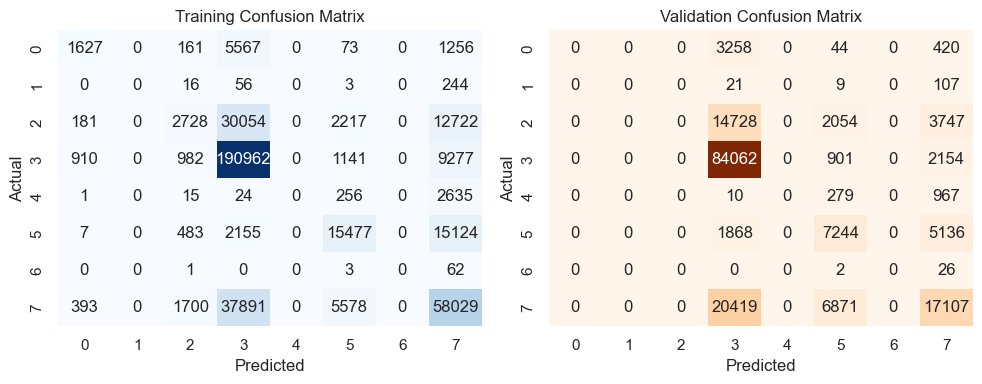

In [ ]:
# Pruned Decision Tree Classifier
pruned_dt = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=50, min_samples_leaf=20)

# Fit pruned Decision Tree model with final features and calculate metrics for training and validation
pruned_dt.fit(final_features_X_train, y_train)
pred_train_dt_final = pruned_dt.predict(final_features_X_train)
pred_val_dt_final = pruned_dt.predict(final_features_X_val)
metrics(y_train, pred_train_dt_final, y_val, pred_val_dt_final)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.51      0.03      0.05      8684
           1       0.00      0.00      0.00       319
           2       0.51      0.06      0.11     47902
           3       0.78      0.97      0.86    203272
           4       0.00      0.00      0.00      2931
           5       0.63      0.51      0.56     33246
           6       0.00      0.00      0.00        66
           7       0.67      0.73      0.70    103591

    accuracy                           0.73    400011
   macro avg       0.39      0.29      0.29    400011
weighted avg       0.69      0.73      0.68    400011

[[   243      0    100   

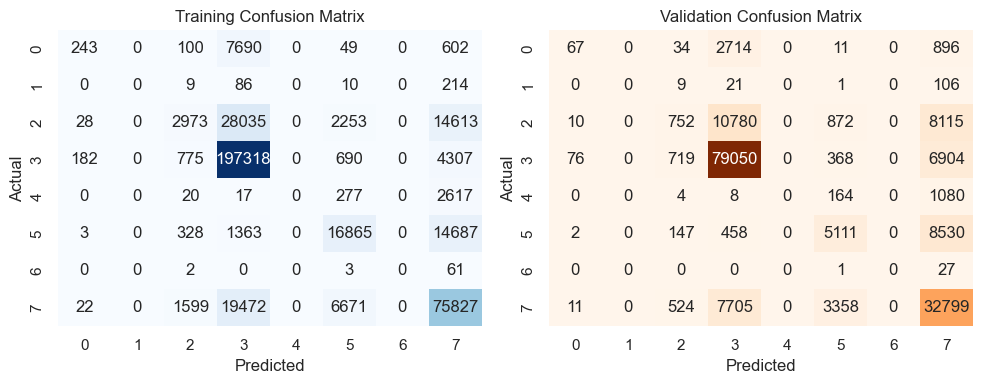

In [ ]:
# Fit pruned Decision Tree model with potential value features and calculate metrics for training and validation
pruned_dt.fit(potential_value_X_train, y_train)
pred_train_dt_potential = pruned_dt.predict(potential_value_X_train)
pred_val_dt_potential = pruned_dt.predict(potential_value_X_val)
metrics(y_train, pred_train_dt_potential, y_val, pred_val_dt_potential)

> ### Random forest

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.62      0.15      0.24      8684
           1       0.00      0.00      0.00       319
           2       0.52      0.04      0.07     47902
           3       0.71      0.95      0.81    203272
           4       0.00      0.00      0.00      2931
           5       0.67      0.43      0.52     33246
           6       0.00      0.00      0.00        66
           7       0.58      0.58      0.58    103591

    accuracy                           0.67    400011
   macro avg       0.39      0.27      0.28    400011
weighted avg       0.64      0.67      0.62    400011

[[  1316      0     81   

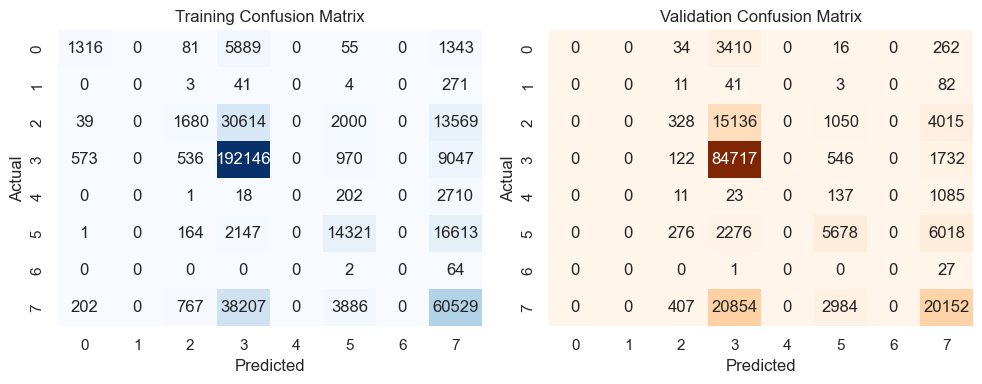

In [ ]:
# Fit Random Forest model with final features and potential value features
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Fit Random Forest model with final features and calculate metrics for training and validation
rf.fit(final_features_X_train, y_train)
pred_train_rf_final = rf.predict(final_features_X_train)
pred_val_rf_final = rf.predict(final_features_X_val)
metrics(y_train, pred_train_rf_final, y_val, pred_val_rf_final)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.00      0.01      8684
           1       0.00      0.00      0.00       319
           2       0.76      0.01      0.03     47902
           3       0.76      0.97      0.85    203272
           4       0.00      0.00      0.00      2931
           5       0.71      0.40      0.51     33246
           6       0.00      0.00      0.00        66
           7       0.64      0.74      0.69    103591

    accuracy                           0.72    400011
   macro avg       0.46      0.27      0.26    400011
weighted avg       0.72      0.72      0.66    400011

[[    40      0      9   

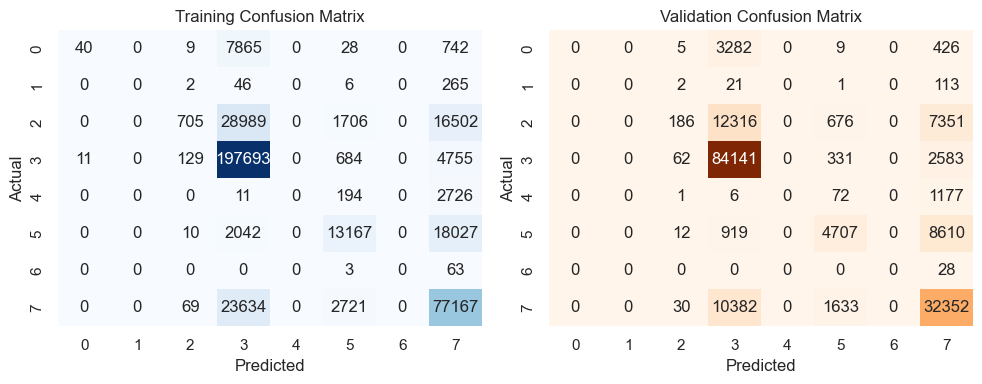

In [ ]:
# Fit Random Forest model with potential value features and calculate metrics for training and validation
rf.fit(potential_value_X_train, y_train)
pred_train_rf_potential = rf.predict(potential_value_X_train)
pred_val_rf_potential = rf.predict(potential_value_X_val)
metrics(y_train, pred_train_rf_potential, y_val, pred_val_rf_potential)

> ### Decision Tree with CV

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Pruned Decision Tree Classifier
pruned_dt = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=50, min_samples_leaf=20)

# Perform 5-fold cross-validation on the training set for Decision Tree
dt_scores = cross_val_score(pruned_dt, final_features_X_train, y_train, cv=5)
print(f"Decision Tree Cross-Validation Accuracy: {dt_scores.mean()}")

Decision Tree Cross-Validation Accuracy: 0.6676916363655163


In [ ]:
# Pruned Decision Tree Classifier
pruned_dt = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=50, min_samples_leaf=20)

# Perform 5-fold cross-validation on the training set for Decision Tree
dt_scores = cross_val_score(pruned_dt, potential_value_X_train, y_train, cv=5)
print(f"Decision Tree Cross-Validation Accuracy: {dt_scores.mean()}")

Decision Tree Cross-Validation Accuracy: 0.7285999641004313


> ### Neural network

In [ ]:
!pip install keras



[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install tensorflow --upgrade

     ---------------------------------------- 0.0/59.7 kB ? eta -:--:--
     ---------------------------------------- 59.7/59.7 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     --------------------------------- ------ 41.0/48.7 kB ? eta -:--:--
     -------------------------------------- 48.7/48.7 kB 818.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/390.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/390.2 MB 2.6 MB/s eta 0:02:28
   ---------------------------------------- 0.2/390.2 MB 3.1 MB/s eta 0:02:05
   ---------------------------------------- 0.3/390.2 MB 2.9 MB/s eta 0:02:14
   ---------------------------------------- 0.4/390.2 MB 2.8 MB/s eta 0:02:22
   ---------------------------------------- 0.6/390.2 MB 3.0 MB/s eta 0:02:11
   ---------------------------------------- 0.7/390.2 MB 2.9 MB/s eta 0:02:14
   ---------------------------------------- 0.8/390.2 MB 2.8 MB/s eta 0:02:18
   ---

ERROR: THESE PACKAGES DO NOT MATCH THE HASHES FROM THE REQUIREMENTS FILE. If you have updated the package versions, please update the hashes. Otherwise, examine the package contents carefully; someone may have tampered with them.
    unknown package:
        Expected sha256 af380d326e146f2d184a940ccf8350e9b6dc06a0530bfaa3a557b73819c4017b
             Got        0e6b569d88e4f16d7205c29429c733310f10e7e74cfb0a3017893135501ccece


[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:

unique_classes = np.unique(y_train)
print(f"Unique Classes in y_train: {unique_classes}")


Unique Classes in y_train: [0 1 2 3 4 5 6 7]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


# Define a neural network model for multi-class classification
model = Sequential()
model.add(Dense(32, input_dim=final_features_X_train.shape[1], activation='relu'))  # First hidden layer with 32 neurons
model.add(Dense(16, activation='relu'))  # Second hidden layer with 16 neurons
model.add(Dense(16, activation='relu'))  # third hidden layer with 16 neurons
model.add(Dense(8, activation='softmax'))  # Output layer with 5 units for 5 classes

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model on the training data
model.fit(final_features_X_train, y_train, epochs=20, batch_size=32, validation_data=(final_features_X_val, y_val), verbose=1, callbacks=[early_stopping])

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(final_features_X_val, y_val, verbose=1)
print(f"Validation Accuracy: {val_accuracy}")

Epoch 1/20
12501/12501 [==============================] - 44s 3ms/step - loss: 1.1388 - accuracy: 0.6026 - val_loss: 1.1090 - val_accuracy: 0.6274
Epoch 2/20
12501/12501 [==============================] - 43s 3ms/step - loss: 1.0051 - accuracy: 0.6352 - val_loss: 1.1148 - val_accuracy: 0.6222
Epoch 3/20
12501/12501 [==============================] - 46s 4ms/step - loss: 0.9908 - accuracy: 0.6402 - val_loss: 1.0336 - val_accuracy: 0.6241
Epoch 4/20
12501/12501 [==============================] - 28s 2ms/step - loss: 0.9818 - accuracy: 0.6444 - val_loss: 1.0540 - val_accuracy: 0.6220
Epoch 5/20
12501/12501 [==============================] - 23s 2ms/step - loss: 0.9755 - accuracy: 0.6466 - val_loss: 1.0641 - val_accuracy: 0.6219
Epoch 6/20
12501/12501 [==============================] - 24s 2ms/step - loss: 0.9708 - accuracy: 0.6480 - val_loss: 1.1125 - val_accuracy: 0.6274
Epoch 7/20
12501/12501 [==============================] - 24s 2ms/step - loss: 0.9675 - accuracy: 0.6489 - val_loss: 1